# The most simple machine learning model

In this first hands-on we will work with the most simpel machine learning model possible. The dataset we will work with is the price of a phone subscription over the past year:

| Month | Minutes | Fee |
|------------|---------------|--------|
|  Jan       |   34       |  60   |
|  Feb     |      145     |  94   |
|     Mar    |     195      |   108    |
|      Apr   |      16    |   55    |
|     May    |       65    |   70    |
|    Jun     |     30   |  59    |
|     Jul    |      126    | 88      |
|    Aug     |       194       |   108    |
|    Sep     |      115        |   84    |
|    Oct     |          120    |   86    |
|     Nov    |      166        |    100   |
|    Dec     |      97    |  79     |

We will build a model to predict the price of based on the number of minutes 

In [0]:
import pandas as pd
import numpy as np

data = pd.DataFrame(np.array([[ "Jan", 34, 60],
[ "Feb", 145, 94],
[ "Mar", 195, 108],
[ "Apr", 16, 55],
[ "May", 65, 70],
[ "Jun", 30, 59],
[ "Jul", 126, 88],
[ "Aug", 194, 108],
[ "Sep", 115, 84],
[ "Oct", 120, 86],
[ "Nov", 166, 100],
[ "Dec", 97, 79]]), columns=["month", "minutes", "fee"])
data['fee']=data['fee'].astype('float32')
data['minutes']=data['minutes'].astype('float32')

Let's make a guess of the model. 

$$ fee = a * minutes+b $$

In [0]:
a=0.2
b=80


data["predicted_fee"]=a*data["minutes"]+b
data

,month,minutes,fee,predicted_fee
0,Jan,34.0,60.0,86.800003
1,Feb,145.0,94.0,109.000000
2,Mar,195.0,108.0,119.000000
3,Apr,16.0,55.0,83.199997
4,May,65.0,70.0,93.000000
5,Jun,30.0,59.0,86.000000
6,Jul,126.0,88.0,105.199997
7,Aug,194.0,108.0,118.800003
8,Sep,115.0,84.0,103.000000
9,Oct,120.0,86.0,104.000000


How good is our model? How do we measure this?

In [0]:
def sum_error(d):
  return sum(abs(data["predicted_fee"]-data["fee"]))

sum_error(data)

229.5999984741211

Grid search

In [0]:
a=0.0
b=0

lowest_error=float("inf")
best_a=None
best_b=None
while a<3.0:
  b=0
  while b<100:
    data["predicted_fee"]=a*data["minutes"]+b
    error=sum_error(data)
    if error < lowest_error:
      lowest_error=error
      best_a=a
      best_b=b
    b+=1
  a+=0.1


In [0]:
print("Best a: "+str(best_a))
print("Best b: "+str(best_b))

Best a: 0.30000000000000004
Best b: 50


We can plot the error:

In [0]:
a=0.0
b=0

grid_data=[]

while a<1.0:
  b=0
  while b<100:
    data["predicted_fee"]=a*data["minutes"]+b
    error=sum_error(data)
    grid_data.append([a,b,error])
    b+=1
  a+=0.05

grid_dataframe = pd.DataFrame(grid_data, columns=["a", "b", "error"])

In [0]:
grid_dataframe.head(10)

,a,b,error
0,0.0,0,991.0
1,0.0,1,979.0
2,0.0,2,967.0
3,0.0,3,955.0
4,0.0,4,943.0
5,0.0,5,931.0
6,0.0,6,919.0
7,0.0,7,907.0
8,0.0,8,895.0
9,0.0,9,883.0


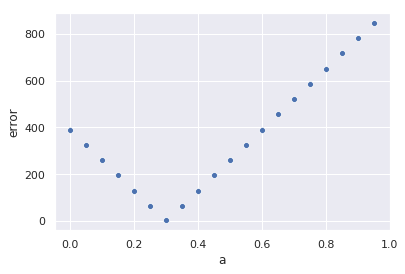

In [0]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax=sns.scatterplot(x="a", y="error", data=grid_dataframe[grid_dataframe["b"]==50][["a", "error"]])

In [0]:
%%html


<svg version="1.1" viewBox="0.0 0.0 538.4356955380578 266.99212598425197" fill="none" stroke="none" stroke-linecap="square" stroke-miterlimit="10" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg"><clipPath id="p.0"><path d="m0 0l538.43567 0l0 266.99213l-538.43567 0l0 -266.99213z" clip-rule="nonzero"/></clipPath><g clip-path="url(#p.0)"><path fill="#000000" fill-opacity="0.0" d="m0 0l538.43567 0l0 266.99213l-538.43567 0z" fill-rule="evenodd"/><path fill="#cfe2f3" d="m155.86351 55.459316l205.32283 0l0 159.40157l-205.32283 0z" fill-rule="evenodd"/><path stroke="#000000" stroke-width="4.0" stroke-linejoin="round" stroke-linecap="butt" d="m155.86351 55.459316l205.32283 0l0 159.40157l-205.32283 0z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m8.9921255 182.00262l147.37007 0.6299286" fill-rule="evenodd"/><path stroke="#000000" stroke-width="4.0" stroke-linejoin="round" stroke-linecap="butt" d="m8.9921255 182.00262l123.3703 0.5273285" fill-rule="evenodd"/><path fill="#000000" stroke="#000000" stroke-width="4.0" stroke-linecap="butt" d="m132.33418 189.13683l18.180466 -6.5292816l-18.123978 -6.6844482z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m170.57217 105.61811l175.90552 0l0 38.614174l-175.90552 0z" fill-rule="evenodd"/><path fill="#000000" d="m180.9628 132.5381l0 -13.359367l2.65625 0l3.15625 9.453117q0.4375 1.328125 0.640625 1.984375q0.234375 -0.734375 0.703125 -2.140625l3.203125 -9.296867l2.375 0l0 13.359367l-1.703125 0l0 -11.171867l-3.875 11.171867l-1.59375 0l-3.859375 -11.374992l0 11.374992l-1.703125 0zm21.697052 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9374924q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1874924q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.6718674q-0.890625 0.37499237 -2.671875 0.6249924q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.6093674zm10.516342 1.3124924l1.609375 0.21875q-0.265625 1.65625 -1.359375 2.609375q-1.078125 0.9375 -2.671875 0.9375q-1.984375 0 -3.1875 -1.296875q-1.203125 -1.296875 -1.203125 -3.7187424q0 -1.578125 0.515625 -2.75q0.515625 -1.171875 1.578125 -1.75q1.0625 -0.59375 2.3125 -0.59375q1.578125 0 2.578125 0.796875q1.0 0.796875 1.28125 2.265625l-1.59375 0.234375q-0.234375 -0.96875 -0.8125 -1.453125q-0.578125 -0.5 -1.390625 -0.5q-1.234375 0 -2.015625 0.890625q-0.78125 0.890625 -0.78125 2.8125q0 1.9531174 0.75 2.8437424q0.75 0.875 1.953125 0.875q0.96875 0 1.609375 -0.59375q0.65625 -0.59375 0.828125 -1.828125zm3.015625 3.546875l0 -13.359367l1.640625 0l0 4.796875q1.140625 -1.328125 2.890625 -1.328125q1.078125 0 1.859375 0.421875q0.796875 0.421875 1.140625 1.171875q0.34375 0.75 0.34375 2.171875l0 6.1249924l-1.640625 0l0 -6.1249924q0 -1.234375 -0.53125 -1.796875q-0.53125 -0.5625 -1.515625 -0.5625q-0.71875 0 -1.359375 0.390625q-0.640625 0.375 -0.921875 1.015625q-0.265625 0.640625 -0.265625 1.78125l0 5.2968674l-1.640625 0zm10.375717 -11.468742l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.468742l0 -9.671867l1.640625 0l0 9.671867l-1.640625 0zm4.144821 0l0 -9.671867l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.9531174l-1.640625 0l0 -5.8906174q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.2812424l-1.640625 0zm17.000717 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.6718674q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.43749237l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.6562424l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm14.449646 5.7656174l0 -13.359367l1.78125 0l0 11.781242l6.5625 0l0 1.578125l-8.34375 0zm16.875732 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.6718674q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.43749237l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.6562424l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625zm15.453827 4.5781174q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9374924q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1874924q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.6718674q-0.890625 0.37499237 -2.671875 0.6249924q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.6093674zm4.1882324 4.8593674l0 -9.671867l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0624924l-1.625 0zm6.228302 0l0 -9.671867l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.9531174l-1.640625 0l0 -5.8906174q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.2812424l-1.640625 0zm10.375702 -11.468742l0 -1.890625l1.640625 0l0 1.890625l-1.640625 0zm0 11.468742l0 -9.671867l1.640625 0l0 9.671867l-1.640625 0zm4.1448364 0l0 -9.671867l1.46875 0l0 1.375q1.0625 -1.59375 3.078125 -1.59375q0.875 0 1.609375 0.3125q0.734375 0.3125 1.09375 0.828125q0.375 0.5 0.515625 1.203125q0.09375 0.453125 0.09375 1.59375l0 5.9531174l-1.640625 0l0 -5.8906174q0 -1.0 -0.203125 -1.484375q-0.1875 -0.5 -0.671875 -0.796875q-0.484375 -0.296875 -1.140625 -0.296875q-1.046875 0 -1.8125 0.671875q-0.75 0.65625 -0.75 2.515625l0 5.2812424l-1.640625 0zm10.063202 0.796875l1.59375 0.234375q0.109375 0.75 0.5625 1.078125q0.609375 0.453125 1.671875 0.453125q1.140625 0 1.75 -0.453125q0.625 -0.453125 0.84375 -1.265625q0.125 -0.5 0.109375 -2.109375q-1.0625 1.265625 -2.671875 1.265625q-2.0 0 -3.09375 -1.4375q-1.09375 -1.4375 -1.09375 -3.4531174q0 -1.390625 0.5 -2.5625q0.515625 -1.171875 1.453125 -1.796875q0.953125 -0.640625 2.25 -0.640625q1.703125 0 2.8125 1.375l0 -1.15625l1.515625 0l0 8.359367q0 2.265625 -0.46875 3.203125q-0.453125 0.9375 -1.453125 1.484375q-0.984375 0.546875 -2.453125 0.546875q-1.71875 0 -2.796875 -0.78125q-1.0625 -0.765625 -1.03125 -2.34375zm1.359375 -5.8124924q0 1.9062424 0.75 2.7812424q0.765625 0.875 1.90625 0.875q1.125 0 1.890625 -0.859375q0.765625 -0.875 0.765625 -2.7343674q0 -1.78125 -0.796875 -2.671875q-0.78125 -0.90625 -1.890625 -0.90625q-1.09375 0 -1.859375 0.890625q-0.765625 0.875 -0.765625 2.625z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m361.18634 135.16011l137.60632 -0.724411" fill-rule="evenodd"/><path stroke="#000000" stroke-width="4.0" stroke-linejoin="round" stroke-linecap="butt" d="m361.18634 135.16011l113.60663 -0.59806824" fill-rule="evenodd"/><path fill="#000000" stroke="#000000" stroke-width="4.0" stroke-linecap="butt" d="m474.82776 141.16888l18.11737 -6.702408l-18.18692 -6.5112762z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m7.1154857 30.204725l113.543304 0l0 28.15748l-113.543304 0z" fill-rule="evenodd"/><path fill="#000000" d="m17.552986 57.12472l0 -13.359375l4.609375 0q1.546875 0 2.375 0.203125q1.140625 0.25 1.953125 0.953125q1.0625 0.890625 1.578125 2.28125q0.53125 1.390625 0.53125 3.171875q0 1.515625 -0.359375 2.703125q-0.359375 1.171875 -0.921875 1.9375q-0.546875 0.765625 -1.203125 1.21875q-0.65625 0.4375 -1.59375 0.671875q-0.9375 0.21875 -2.140625 0.21875l-4.828125 0zm1.765625 -1.578125l2.859375 0q1.3125 0 2.0625 -0.234375q0.75 -0.25 1.203125 -0.703125q0.625 -0.625 0.96875 -1.6875q0.359375 -1.0625 0.359375 -2.578125q0 -2.09375 -0.6875 -3.21875q-0.6875 -1.125 -1.671875 -1.5q-0.703125 -0.28125 -2.28125 -0.28125l-2.8125 0l0 10.203125zm17.816696 0.390625q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm7.781967 3.390625l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm7.917679 0.28125q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m7.1154857 52.464565l215.68504 0l0 25.165356l-215.68504 0z" fill-rule="evenodd"/><path fill="#000000" d="m16.818611 71.70457l0 -5.53125l0.84375 0l0 0.78125q0.25 -0.40625 0.6875 -0.65625q0.4375 -0.25 0.984375 -0.25q0.609375 0 1.0 0.265625q0.390625 0.25 0.5625 0.703125q0.65625 -0.96875 1.703125 -0.96875q0.828125 0 1.265625 0.46875q0.4375 0.453125 0.4375 1.390625l0 3.796875l-0.921875 0l0 -3.484375q0 -0.5625 -0.09375 -0.796875q-0.09375 -0.25 -0.34375 -0.40625q-0.234375 -0.15625 -0.546875 -0.15625q-0.59375 0 -0.984375 0.390625q-0.375 0.390625 -0.375 1.25l0 3.203125l-0.9375 0l0 -3.59375q0 -0.625 -0.234375 -0.9375q-0.21875 -0.3125 -0.75 -0.3125q-0.390625 0 -0.734375 0.21875q-0.328125 0.203125 -0.484375 0.609375q-0.140625 0.390625 -0.140625 1.15625l0 2.859375l-0.9375 0zm8.8767395 -6.546875l0 -1.078125l0.9375 0l0 1.078125l-0.9375 0zm0 6.546875l0 -5.53125l0.9375 0l0 5.53125l-0.9375 0zm2.3674774 0l0 -5.53125l0.84375 0l0 0.796875q0.609375 -0.921875 1.75 -0.921875q0.5 0 0.921875 0.1875q0.421875 0.171875 0.625 0.46875q0.21875 0.296875 0.296875 0.6875q0.046875 0.265625 0.046875 0.921875l0 3.390625l-0.9375 0l0 -3.359375q0 -0.578125 -0.109375 -0.859375q-0.109375 -0.28125 -0.390625 -0.453125q-0.265625 -0.171875 -0.640625 -0.171875q-0.59375 0 -1.03125 0.390625q-0.4375 0.375 -0.4375 1.4375l0 3.015625l-0.9375 0zm9.551498 0l0 -0.8125q-0.65625 0.9375 -1.75 0.9375q-0.5 0 -0.921875 -0.1875q-0.421875 -0.1875 -0.625 -0.46875q-0.203125 -0.28125 -0.296875 -0.703125q-0.046875 -0.265625 -0.046875 -0.875l0 -3.421875l0.9375 0l0 3.0625q0 0.734375 0.046875 1.0q0.09375 0.359375 0.375 0.578125q0.296875 0.203125 0.703125 0.203125q0.421875 0 0.796875 -0.203125q0.375 -0.21875 0.515625 -0.59375q0.15625 -0.375 0.15625 -1.078125l0 -2.96875l0.9375 0l0 5.53125l-0.828125 0zm4.3483734 -0.84375l0.125 0.828125q-0.390625 0.09375 -0.703125 0.09375q-0.5 0 -0.78125 -0.15625q-0.28125 -0.171875 -0.40625 -0.4375q-0.109375 -0.265625 -0.109375 -1.109375l0 -3.171875l-0.6875 0l0 -0.734375l0.6875 0l0 -1.359375l0.9375 -0.5625l0 1.921875l0.9375 0l0 0.734375l-0.9375 0l0 3.234375q0 0.390625 0.046875 0.515625q0.046875 0.109375 0.15625 0.1875q0.109375 0.0625 0.328125 0.0625q0.15625 0 0.40625 -0.046875zm4.6950226 -0.9375l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm4.8483734 1.640625l0.921875 -0.140625q0.078125 0.5625 0.4375 0.859375q0.359375 0.296875 1.0 0.296875q0.640625 0 0.953125 -0.265625q0.3125 -0.265625 0.3125 -0.625q0 -0.3125 -0.28125 -0.5q-0.1875 -0.125 -0.953125 -0.3125q-1.03125 -0.265625 -1.4375 -0.453125q-0.390625 -0.1875 -0.59375 -0.515625q-0.203125 -0.34375 -0.203125 -0.75q0 -0.359375 0.171875 -0.671875q0.171875 -0.328125 0.453125 -0.53125q0.21875 -0.15625 0.59375 -0.265625q0.390625 -0.125 0.8125 -0.125q0.65625 0 1.140625 0.1875q0.5 0.1875 0.734375 0.515625q0.234375 0.3125 0.3125 0.859375l-0.90625 0.125q-0.0625 -0.4375 -0.375 -0.671875q-0.296875 -0.234375 -0.828125 -0.234375q-0.65625 0 -0.9375 0.21875q-0.265625 0.203125 -0.265625 0.484375q0 0.1875 0.109375 0.328125q0.125 0.15625 0.359375 0.25q0.140625 0.0625 0.828125 0.25q1.0 0.265625 1.390625 0.4375q0.390625 0.15625 0.609375 0.484375q0.234375 0.3125 0.234375 0.796875q0 0.46875 -0.28125 0.890625q-0.265625 0.40625 -0.78125 0.640625q-0.515625 0.21875 -1.171875 0.21875q-1.078125 0 -1.640625 -0.4375q-0.5625 -0.453125 -0.71875 -1.34375zm10.625 -2.828125l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm0 2.3125l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm1.3168335 4.296875l0 -9.75l2.0625 0l0 0.765625l-1.125 0l0 8.203125l1.125 0l0 0.78125l-2.0625 0zm2.6950226 -4.140625l0.9375 -0.125q0.15625 0.796875 0.546875 1.15625q0.390625 0.34375 0.9375 0.34375q0.65625 0 1.109375 -0.453125q0.46875 -0.46875 0.46875 -1.140625q0 -0.640625 -0.421875 -1.0625q-0.421875 -0.421875 -1.078125 -0.421875q-0.265625 0 -0.65625 0.109375l0.109375 -0.828125q0.09375 0.015625 0.140625 0.015625q0.59375 0 1.078125 -0.3125q0.484375 -0.3125 0.484375 -0.96875q0 -0.515625 -0.359375 -0.84375q-0.34375 -0.34375 -0.890625 -0.34375q-0.546875 0 -0.921875 0.34375q-0.359375 0.34375 -0.453125 1.03125l-0.9375 -0.171875q0.171875 -0.9375 0.78125 -1.453125q0.609375 -0.515625 1.5 -0.515625q0.625 0 1.15625 0.265625q0.53125 0.265625 0.796875 0.734375q0.28125 0.453125 0.28125 0.984375q0 0.484375 -0.265625 0.890625q-0.265625 0.40625 -0.78125 0.65625q0.671875 0.15625 1.046875 0.65625q0.375 0.484375 0.375 1.21875q0 1.0 -0.734375 1.703125q-0.71875 0.6875 -1.828125 0.6875q-1.0 0 -1.671875 -0.59375q-0.65625 -0.609375 -0.75 -1.5625zm8.910873 2.015625l0 -1.828125l-3.296875 0l0 -0.859375l3.46875 -4.9375l0.765625 0l0 4.9375l1.03125 0l0 0.859375l-1.03125 0l0 1.828125l-0.9375 0zm0 -2.6875l0 -3.4375l-2.375 3.4375l2.375 0zm3.4421234 2.6875l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm5.3952484 0l0 -1.828125l-3.296875 0l0 -0.859375l3.46875 -4.9375l0.765625 0l0 4.9375l1.03125 0l0 0.859375l-1.03125 0l0 1.828125l-0.9375 0zm0 -2.6875l0 -3.4375l-2.375 3.4375l2.375 0zm2.9264984 0.6875l0.984375 -0.078125q0.109375 0.71875 0.5 1.078125q0.40625 0.359375 0.96875 0.359375q0.671875 0 1.140625 -0.5q0.46875 -0.515625 0.46875 -1.359375q0 -0.796875 -0.453125 -1.265625q-0.4375 -0.46875 -1.171875 -0.46875q-0.453125 0 -0.8125 0.21875q-0.359375 0.203125 -0.578125 0.53125l-0.875 -0.125l0.734375 -3.921875l3.796875 0l0 0.90625l-3.046875 0l-0.40625 2.046875q0.6875 -0.484375 1.4375 -0.484375q1.0 0 1.6875 0.703125q0.6875 0.6875 0.6875 1.765625q0 1.046875 -0.609375 1.796875q-0.734375 0.921875 -2.0 0.921875q-1.03125 0 -1.703125 -0.578125q-0.65625 -0.578125 -0.75 -1.546875zm6.4421234 2.0l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm2.5358734 -1.765625l0.90625 -0.078125q0.109375 0.625 0.4375 0.921875q0.328125 0.28125 0.828125 0.28125q0.421875 0 0.75 -0.1875q0.328125 -0.203125 0.53125 -0.53125q0.21875 -0.34375 0.359375 -0.890625q0.140625 -0.5625 0.140625 -1.15625q0 -0.0625 -0.015625 -0.1875q-0.28125 0.453125 -0.765625 0.734375q-0.484375 0.265625 -1.046875 0.265625q-0.953125 0 -1.609375 -0.671875q-0.65625 -0.6875 -0.65625 -1.8125q0 -1.171875 0.6875 -1.875q0.6875 -0.703125 1.71875 -0.703125q0.734375 0 1.34375 0.40625q0.625 0.390625 0.9375 1.140625q0.328125 0.734375 0.328125 2.140625q0 1.453125 -0.3125 2.328125q-0.3125 0.859375 -0.953125 1.3125q-0.625 0.453125 -1.46875 0.453125q-0.890625 0 -1.453125 -0.484375q-0.5625 -0.5 -0.6875 -1.40625zm3.84375 -3.359375q0 -0.8125 -0.4375 -1.28125q-0.421875 -0.484375 -1.03125 -0.484375q-0.625 0 -1.09375 0.515625q-0.453125 0.515625 -0.453125 1.328125q0 0.71875 0.4375 1.1875q0.4375 0.453125 1.078125 0.453125q0.65625 0 1.078125 -0.453125q0.421875 -0.46875 0.421875 -1.265625zm1.9421234 3.125l0.984375 -0.078125q0.109375 0.71875 0.5 1.078125q0.40625 0.359375 0.96875 0.359375q0.671875 0 1.140625 -0.5q0.46875 -0.515625 0.46875 -1.359375q0 -0.796875 -0.453125 -1.265625q-0.4375 -0.46875 -1.171875 -0.46875q-0.453125 0 -0.8125 0.21875q-0.359375 0.203125 -0.578125 0.53125l-0.875 -0.125l0.734375 -3.921875l3.796875 0l0 0.90625l-3.046875 0l-0.40625 2.046875q0.6875 -0.484375 1.4375 -0.484375q1.0 0 1.6875 0.703125q0.6875 0.6875 0.6875 1.765625q0 1.046875 -0.609375 1.796875q-0.734375 0.921875 -2.0 0.921875q-1.03125 0 -1.703125 -0.578125q-0.65625 -0.578125 -0.75 -1.546875zm6.4421234 2.0l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.936913 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm7.2546234 -5.765625l-0.921875 0.078125q-0.125 -0.546875 -0.359375 -0.796875q-0.375 -0.40625 -0.9375 -0.40625q-0.4375 0 -0.78125 0.25q-0.4375 0.328125 -0.703125 0.953125q-0.25 0.609375 -0.265625 1.75q0.34375 -0.515625 0.828125 -0.765625q0.5 -0.25 1.03125 -0.25q0.9375 0 1.59375 0.703125q0.65625 0.6875 0.65625 1.765625q0 0.71875 -0.3125 1.34375q-0.3125 0.609375 -0.859375 0.9375q-0.53125 0.328125 -1.21875 0.328125q-1.171875 0 -1.90625 -0.859375q-0.734375 -0.859375 -0.734375 -2.828125q0 -2.21875 0.8125 -3.21875q0.71875 -0.875 1.921875 -0.875q0.890625 0 1.46875 0.5q0.578125 0.5 0.6875 1.390625zm-3.8125 3.296875q0 0.484375 0.203125 0.921875q0.203125 0.4375 0.5625 0.671875q0.375 0.234375 0.78125 0.234375q0.59375 0 1.015625 -0.46875q0.4375 -0.484375 0.4375 -1.3125q0 -0.78125 -0.421875 -1.234375q-0.421875 -0.46875 -1.0625 -0.46875q-0.640625 0 -1.078125 0.46875q-0.4375 0.453125 -0.4375 1.1875zm5.4108734 2.46875l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.9606476 0l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.9606476 0l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm4.2575226 2.125l-2.0625 0l0 -0.78125l1.125 0l0 -8.203125l-1.125 0l0 -0.765625l2.0625 0l0 9.75z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m8.9921255 86.002625l147.37007 0.62992096" fill-rule="evenodd"/><path stroke="#000000" stroke-width="4.0" stroke-linejoin="round" stroke-linecap="butt" d="m8.9921255 86.002625l123.3703 0.5273361" fill-rule="evenodd"/><path fill="#000000" stroke="#000000" stroke-width="4.0" stroke-linecap="butt" d="m132.33418 93.13683l18.180466 -6.5292816l-18.123978 -6.6844635z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m7.1154857 126.20473l113.543304 0l0 28.15747l-113.543304 0z" fill-rule="evenodd"/><path fill="#000000" d="m17.021736 146.62473q0 -3.328125 1.78125 -5.203125q1.78125 -1.890625 4.609375 -1.890625q1.84375 0 3.328125 0.890625q1.484375 0.875 2.265625 2.46875q0.78125 1.578125 0.78125 3.578125q0 2.03125 -0.828125 3.640625q-0.8125 1.59375 -2.3125 2.421875q-1.5 0.828125 -3.25 0.828125q-1.875 0 -3.359375 -0.90625q-1.484375 -0.921875 -2.25 -2.5q-0.765625 -1.578125 -0.765625 -3.328125zm1.8125 0.015625q0 2.421875 1.296875 3.8125q1.296875 1.390625 3.265625 1.390625q2.0 0 3.28125 -1.40625q1.28125 -1.40625 1.28125 -3.984375q0 -1.625 -0.546875 -2.84375q-0.546875 -1.21875 -1.609375 -1.875q-1.0625 -0.671875 -2.375 -0.671875q-1.890625 0 -3.25 1.296875q-1.34375 1.28125 -1.34375 4.28125zm19.355179 6.484375l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm7.625717 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm1.6051788 5.171875l0 -13.375l1.484375 0l0 1.25q0.53125 -0.734375 1.1875 -1.09375q0.671875 -0.375 1.625 -0.375q1.234375 0 2.171875 0.640625q0.953125 0.625 1.4375 1.796875q0.484375 1.15625 0.484375 2.546875q0 1.484375 -0.53125 2.671875q-0.53125 1.1875 -1.546875 1.828125q-1.015625 0.625 -2.140625 0.625q-0.8125 0 -1.46875 -0.34375q-0.65625 -0.34375 -1.0625 -0.875l0 4.703125l-1.640625 0zm1.484375 -8.484375q0 1.859375 0.75 2.765625q0.765625 0.890625 1.828125 0.890625q1.09375 0 1.875 -0.921875q0.78125 -0.9375 0.78125 -2.875q0 -1.84375 -0.765625 -2.765625q-0.75 -0.921875 -1.8125 -0.921875q-1.046875 0 -1.859375 0.984375q-0.796875 0.96875 -0.796875 2.84375zm15.219467 4.78125l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm7.625717 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m7.1154857 148.46457l215.68504 0l0 25.16536l-215.68504 0z" fill-rule="evenodd"/><path fill="#000000" d="m17.037361 167.70456l0 -4.796875l-0.828125 0l0 -0.734375l0.828125 0l0 -0.578125q0 -0.5625 0.109375 -0.828125q0.125 -0.375 0.46875 -0.59375q0.34375 -0.234375 0.953125 -0.234375q0.390625 0 0.875 0.09375l-0.140625 0.828125q-0.296875 -0.0625 -0.546875 -0.0625q-0.421875 0 -0.609375 0.1875q-0.171875 0.1875 -0.171875 0.6875l0 0.5l1.078125 0l0 0.734375l-1.078125 0l0 4.796875l-0.9375 0zm6.5231476 -1.78125l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm9.004623 1.515625l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm10.145248 -1.1875l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm0 2.3125l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm1.3168335 4.296875l0 -9.75l2.0625 0l0 0.765625l-1.125 0l0 8.203125l1.125 0l0 0.78125l-2.0625 0zm4.1325226 -6.265625q-0.59375 -0.203125 -0.875 -0.59375q-0.28125 -0.40625 -0.28125 -0.953125q0 -0.84375 0.59375 -1.40625q0.609375 -0.5625 1.59375 -0.5625q1.0 0 1.609375 0.578125q0.609375 0.578125 0.609375 1.40625q0 0.53125 -0.28125 0.9375q-0.265625 0.390625 -0.84375 0.59375q0.703125 0.234375 1.0625 0.75q0.375 0.5 0.375 1.203125q0 0.984375 -0.6875 1.65625q-0.6875 0.65625 -1.828125 0.65625q-1.125 0 -1.8125 -0.65625q-0.6875 -0.671875 -0.6875 -1.671875q0 -0.75 0.375 -1.25q0.375 -0.5 1.078125 -0.6875zm-0.1875 -1.578125q0 0.53125 0.34375 0.875q0.34375 0.34375 0.90625 0.34375q0.53125 0 0.875 -0.328125q0.359375 -0.34375 0.359375 -0.84375q0 -0.515625 -0.359375 -0.859375q-0.359375 -0.359375 -0.890625 -0.359375q-0.53125 0 -0.890625 0.34375q-0.34375 0.34375 -0.34375 0.828125zm-0.3125 3.515625q0 0.40625 0.1875 0.78125q0.203125 0.375 0.578125 0.578125q0.375 0.203125 0.796875 0.203125q0.671875 0 1.109375 -0.421875q0.4375 -0.4375 0.4375 -1.109375q0 -0.671875 -0.453125 -1.109375q-0.453125 -0.453125 -1.125 -0.453125q-0.65625 0 -1.09375 0.4375q-0.4375 0.4375 -0.4375 1.09375zm9.832748 -3.5625l-0.921875 0.078125q-0.125 -0.546875 -0.359375 -0.796875q-0.375 -0.40625 -0.9375 -0.40625q-0.4375 0 -0.78125 0.25q-0.4375 0.328125 -0.703125 0.953125q-0.25 0.609375 -0.265625 1.75q0.34375 -0.515625 0.828125 -0.765625q0.5 -0.25 1.03125 -0.25q0.9375 0 1.59375 0.703125q0.65625 0.6875 0.65625 1.765625q0 0.71875 -0.3125 1.34375q-0.3125 0.609375 -0.859375 0.9375q-0.53125 0.328125 -1.21875 0.328125q-1.171875 0 -1.90625 -0.859375q-0.734375 -0.859375 -0.734375 -2.828125q0 -2.21875 0.8125 -3.21875q0.71875 -0.875 1.921875 -0.875q0.890625 0 1.46875 0.5q0.578125 0.5 0.6875 1.390625zm-3.8125 3.296875q0 0.484375 0.203125 0.921875q0.203125 0.4375 0.5625 0.671875q0.375 0.234375 0.78125 0.234375q0.59375 0 1.015625 -0.46875q0.4375 -0.484375 0.4375 -1.3125q0 -0.78125 -0.421875 -1.234375q-0.421875 -0.46875 -1.0625 -0.46875q-0.640625 0 -1.078125 0.46875q-0.4375 0.453125 -0.4375 1.1875zm5.4108734 2.46875l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm3.8825226 -4.140625q-0.59375 -0.203125 -0.875 -0.59375q-0.28125 -0.40625 -0.28125 -0.953125q0 -0.84375 0.59375 -1.40625q0.609375 -0.5625 1.59375 -0.5625q1.0 0 1.609375 0.578125q0.609375 0.578125 0.609375 1.40625q0 0.53125 -0.28125 0.9375q-0.265625 0.390625 -0.84375 0.59375q0.703125 0.234375 1.0625 0.75q0.375 0.5 0.375 1.203125q0 0.984375 -0.6875 1.65625q-0.6875 0.65625 -1.828125 0.65625q-1.125 0 -1.8125 -0.65625q-0.6875 -0.671875 -0.6875 -1.671875q0 -0.75 0.375 -1.25q0.375 -0.5 1.078125 -0.6875zm-0.1875 -1.578125q0 0.53125 0.34375 0.875q0.34375 0.34375 0.90625 0.34375q0.53125 0 0.875 -0.328125q0.359375 -0.34375 0.359375 -0.84375q0 -0.515625 -0.359375 -0.859375q-0.359375 -0.359375 -0.890625 -0.359375q-0.53125 0 -0.890625 0.34375q-0.34375 0.34375 -0.34375 0.828125zm-0.3125 3.515625q0 0.40625 0.1875 0.78125q0.203125 0.375 0.578125 0.578125q0.375 0.203125 0.796875 0.203125q0.671875 0 1.109375 -0.421875q0.4375 -0.4375 0.4375 -1.109375q0 -0.671875 -0.453125 -1.109375q-0.453125 -0.453125 -1.125 -0.453125q-0.65625 0 -1.09375 0.4375q-0.4375 0.4375 -0.4375 1.09375zm5.4889984 2.203125l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm2.3952484 -3.765625q0 -1.34375 0.28125 -2.171875q0.28125 -0.828125 0.828125 -1.265625q0.546875 -0.453125 1.375 -0.453125q0.625 0 1.078125 0.25q0.46875 0.234375 0.765625 0.703125q0.3125 0.46875 0.484375 1.140625q0.171875 0.671875 0.171875 1.796875q0 1.34375 -0.28125 2.171875q-0.28125 0.828125 -0.828125 1.28125q-0.546875 0.4375 -1.390625 0.4375q-1.09375 0 -1.71875 -0.78125q-0.765625 -0.953125 -0.765625 -3.109375zm0.96875 0q0 1.875 0.4375 2.5q0.4375 0.625 1.078125 0.625q0.65625 0 1.09375 -0.625q0.4375 -0.625 0.4375 -2.5q0 -1.875 -0.4375 -2.5q-0.4375 -0.625 -1.09375 -0.625q-0.640625 0 -1.03125 0.546875q-0.484375 0.703125 -0.484375 2.578125zm5.0983734 2.0l0.90625 -0.078125q0.109375 0.625 0.4375 0.921875q0.328125 0.28125 0.828125 0.28125q0.421875 0 0.75 -0.1875q0.328125 -0.203125 0.53125 -0.53125q0.21875 -0.34375 0.359375 -0.890625q0.140625 -0.5625 0.140625 -1.15625q0 -0.0625 -0.015625 -0.1875q-0.28125 0.453125 -0.765625 0.734375q-0.484375 0.265625 -1.046875 0.265625q-0.953125 0 -1.609375 -0.671875q-0.65625 -0.6875 -0.65625 -1.8125q0 -1.171875 0.6875 -1.875q0.6875 -0.703125 1.71875 -0.703125q0.734375 0 1.34375 0.40625q0.625 0.390625 0.9375 1.140625q0.328125 0.734375 0.328125 2.140625q0 1.453125 -0.3125 2.328125q-0.3125 0.859375 -0.953125 1.3125q-0.625 0.453125 -1.46875 0.453125q-0.890625 0 -1.453125 -0.484375q-0.5625 -0.5 -0.6875 -1.40625zm3.84375 -3.359375q0 -0.8125 -0.4375 -1.28125q-0.421875 -0.484375 -1.03125 -0.484375q-0.625 0 -1.09375 0.515625q-0.453125 0.515625 -0.453125 1.328125q0 0.71875 0.4375 1.1875q0.4375 0.453125 1.078125 0.453125q0.65625 0 1.078125 -0.453125q0.421875 -0.46875 0.421875 -1.265625zm2.4577484 5.125l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm5.1348267 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm2.5358734 -1.765625l0.90625 -0.078125q0.109375 0.625 0.4375 0.921875q0.328125 0.28125 0.828125 0.28125q0.421875 0 0.75 -0.1875q0.328125 -0.203125 0.53125 -0.53125q0.21875 -0.34375 0.359375 -0.890625q0.140625 -0.5625 0.140625 -1.15625q0 -0.0625 -0.015625 -0.1875q-0.28125 0.453125 -0.765625 0.734375q-0.484375 0.265625 -1.046875 0.265625q-0.953125 0 -1.609375 -0.671875q-0.65625 -0.6875 -0.65625 -1.8125q0 -1.171875 0.6875 -1.875q0.6875 -0.703125 1.71875 -0.703125q0.734375 0 1.34375 0.40625q0.625 0.390625 0.9375 1.140625q0.328125 0.734375 0.328125 2.140625q0 1.453125 -0.3125 2.328125q-0.3125 0.859375 -0.953125 1.3125q-0.625 0.453125 -1.46875 0.453125q-0.890625 0 -1.453125 -0.484375q-0.5625 -0.5 -0.6875 -1.40625zm3.84375 -3.359375q0 -0.8125 -0.4375 -1.28125q-0.421875 -0.484375 -1.03125 -0.484375q-0.625 0 -1.09375 0.515625q-0.453125 0.515625 -0.453125 1.328125q0 0.71875 0.4375 1.1875q0.4375 0.453125 1.078125 0.453125q0.65625 0 1.078125 -0.453125q0.421875 -0.46875 0.421875 -1.265625zm2.4577484 5.125l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm6.858795 -4.140625q-0.59375 -0.203125 -0.875 -0.59375q-0.28125 -0.40625 -0.28125 -0.953125q0 -0.84375 0.59375 -1.40625q0.609375 -0.5625 1.59375 -0.5625q1.0 0 1.609375 0.578125q0.609375 0.578125 0.609375 1.40625q0 0.53125 -0.28125 0.9375q-0.265625 0.390625 -0.84375 0.59375q0.703125 0.234375 1.0625 0.75q0.375 0.5 0.375 1.203125q0 0.984375 -0.6875 1.65625q-0.6875 0.65625 -1.828125 0.65625q-1.125 0 -1.8125 -0.65625q-0.6875 -0.671875 -0.6875 -1.671875q0 -0.75 0.375 -1.25q0.375 -0.5 1.078125 -0.6875zm-0.1875 -1.578125q0 0.53125 0.34375 0.875q0.34375 0.34375 0.90625 0.34375q0.53125 0 0.875 -0.328125q0.359375 -0.34375 0.359375 -0.84375q0 -0.515625 -0.359375 -0.859375q-0.359375 -0.359375 -0.890625 -0.359375q-0.53125 0 -0.890625 0.34375q-0.34375 0.34375 -0.34375 0.828125zm-0.3125 3.515625q0 0.40625 0.1875 0.78125q0.203125 0.375 0.578125 0.578125q0.375 0.203125 0.796875 0.203125q0.671875 0 1.109375 -0.421875q0.4375 -0.4375 0.4375 -1.109375q0 -0.671875 -0.453125 -1.109375q-0.453125 -0.453125 -1.125 -0.453125q-0.65625 0 -1.09375 0.4375q-0.4375 0.4375 -0.4375 1.09375zm4.9889984 0.1875l0.9375 -0.125q0.15625 0.796875 0.546875 1.15625q0.390625 0.34375 0.9375 0.34375q0.65625 0 1.109375 -0.453125q0.46875 -0.46875 0.46875 -1.140625q0 -0.640625 -0.421875 -1.0625q-0.421875 -0.421875 -1.078125 -0.421875q-0.265625 0 -0.65625 0.109375l0.109375 -0.828125q0.09375 0.015625 0.140625 0.015625q0.59375 0 1.078125 -0.3125q0.484375 -0.3125 0.484375 -0.96875q0 -0.515625 -0.359375 -0.84375q-0.34375 -0.34375 -0.890625 -0.34375q-0.546875 0 -0.921875 0.34375q-0.359375 0.34375 -0.453125 1.03125l-0.9375 -0.171875q0.171875 -0.9375 0.78125 -1.453125q0.609375 -0.515625 1.5 -0.515625q0.625 0 1.15625 0.265625q0.53125 0.265625 0.796875 0.734375q0.28125 0.453125 0.28125 0.984375q0 0.484375 -0.265625 0.890625q-0.265625 0.40625 -0.78125 0.65625q0.671875 0.15625 1.046875 0.65625q0.375 0.484375 0.375 1.21875q0 1.0 -0.734375 1.703125q-0.71875 0.6875 -1.828125 0.6875q-1.0 0 -1.671875 -0.59375q-0.65625 -0.609375 -0.75 -1.5625zm6.4421234 2.015625l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm7.351265 -0.90625l0 0.90625l-5.03125 0q-0.015625 -0.34375 0.109375 -0.65625q0.1875 -0.515625 0.609375 -1.015625q0.421875 -0.5 1.234375 -1.140625q1.234375 -1.03125 1.671875 -1.625q0.4375 -0.59375 0.4375 -1.125q0 -0.5625 -0.40625 -0.9375q-0.390625 -0.390625 -1.03125 -0.390625q-0.671875 0 -1.078125 0.40625q-0.40625 0.40625 -0.40625 1.125l-0.96875 -0.09375q0.09375 -1.078125 0.734375 -1.640625q0.65625 -0.5625 1.734375 -0.5625q1.109375 0 1.75 0.609375q0.640625 0.609375 0.640625 1.5q0 0.46875 -0.1875 0.90625q-0.1875 0.4375 -0.625 0.9375q-0.4375 0.484375 -1.453125 1.328125q-0.828125 0.71875 -1.078125 0.96875q-0.234375 0.25 -0.390625 0.5l3.734375 0zm1.5358734 0.90625l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.9606476 0l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.9606476 0l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm4.2575226 2.125l-2.0625 0l0 -0.78125l1.125 0l0 -8.203125l-1.125 0l0 -0.765625l2.0625 0l0 9.75z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m367.11548 70.20473l113.543304 0l0 28.157478l-113.543304 0z" fill-rule="evenodd"/><path fill="#000000" d="m377.58423 97.124725l0 -13.359375l5.921875 0q1.78125 0 2.703125 0.359375q0.9375 0.359375 1.484375 1.28125q0.5625 0.90625 0.5625 2.015625q0 1.40625 -0.921875 2.390625q-0.921875 0.96875 -2.84375 1.234375q0.703125 0.34375 1.078125 0.671875q0.765625 0.703125 1.453125 1.765625l2.328125 3.640625l-2.21875 0l-1.765625 -2.78125q-0.78125 -1.203125 -1.28125 -1.828125q-0.5 -0.640625 -0.90625 -0.890625q-0.390625 -0.265625 -0.796875 -0.359375q-0.296875 -0.078125 -0.984375 -0.078125l-2.046875 0l0 5.9375l-1.765625 0zm1.765625 -7.453125l3.796875 0q1.21875 0 1.890625 -0.25q0.6875 -0.265625 1.046875 -0.8125q0.359375 -0.546875 0.359375 -1.1875q0 -0.953125 -0.6875 -1.5625q-0.6875 -0.609375 -2.1875 -0.609375l-4.21875 0l0 4.421875zm17.801086 7.453125l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm4.000702 0l0 -13.359375l1.640625 0l0 13.359375l-1.640625 0zm10.816711 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m367.11548 92.46457l215.68506 0l0 25.165352l-215.68506 0z" fill-rule="evenodd"/><path fill="#000000" d="m377.03735 111.70457l0 -4.796875l-0.828125 0l0 -0.734375l0.828125 0l0 -0.578125q0 -0.5625 0.109375 -0.828125q0.125 -0.375 0.46875 -0.59375q0.34375 -0.234375 0.953125 -0.234375q0.390625 0 0.875 0.09375l-0.140625 0.828125q-0.296875 -0.0625 -0.546875 -0.0625q-0.421875 0 -0.609375 0.1875q-0.171875 0.1875 -0.171875 0.6875l0 0.5l1.078125 0l0 0.734375l-1.078125 0l0 4.796875l-0.9375 0zm6.523163 -1.78125l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm9.004608 1.515625l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm13.105896 -1.1875l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm0 2.3125l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm3.9962463 -1.59375q0 -1.34375 0.28125 -2.171875q0.28125 -0.828125 0.828125 -1.265625q0.546875 -0.453125 1.375 -0.453125q0.625 0 1.078125 0.25q0.46875 0.234375 0.765625 0.703125q0.3125 0.46875 0.484375 1.140625q0.171875 0.671875 0.171875 1.796875q0 1.34375 -0.28125 2.171875q-0.28125 0.828125 -0.828125 1.28125q-0.546875 0.4375 -1.390625 0.4375q-1.09375 0 -1.71875 -0.78125q-0.765625 -0.953125 -0.765625 -3.109375zm0.96875 0q0 1.875 0.4375 2.5q0.4375 0.625 1.078125 0.625q0.65625 0 1.09375 -0.625q0.4375 -0.625 0.4375 -2.5q0 -1.875 -0.4375 -2.5q-0.4375 -0.625 -1.09375 -0.625q-0.640625 0 -1.03125 0.546875q-0.484375 0.703125 -0.484375 2.578125zm5.488983 3.765625l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.4450378 -2.015625l0.9375 -0.125q0.15625 0.796875 0.546875 1.15625q0.390625 0.34375 0.9375 0.34375q0.65625 0 1.109375 -0.453125q0.46875 -0.46875 0.46875 -1.140625q0 -0.640625 -0.421875 -1.0625q-0.421875 -0.421875 -1.078125 -0.421875q-0.265625 0 -0.65625 0.109375l0.109375 -0.828125q0.09375 0.015625 0.140625 0.015625q0.59375 0 1.078125 -0.3125q0.484375 -0.3125 0.484375 -0.96875q0 -0.515625 -0.359375 -0.84375q-0.34375 -0.34375 -0.890625 -0.34375q-0.546875 0 -0.921875 0.34375q-0.359375 0.34375 -0.453125 1.03125l-0.9375 -0.171875q0.171875 -0.9375 0.78125 -1.453125q0.609375 -0.515625 1.5 -0.515625q0.625 0 1.15625 0.265625q0.53125 0.265625 0.796875 0.734375q0.28125 0.453125 0.28125 0.984375q0 0.484375 -0.265625 0.890625q-0.265625 0.40625 -0.78125 0.65625q0.671875 0.15625 1.046875 0.65625q0.375 0.484375 0.375 1.21875q0 1.0 -0.734375 1.703125q-0.71875 0.6875 -1.828125 0.6875q-1.0 0 -1.671875 -0.59375q-0.65625 -0.609375 -0.75 -1.5625zm8.762146 -4.21875l0.25 -0.734375q0.828125 0.296875 1.203125 0.5q-0.109375 -0.9375 -0.109375 -1.296875l0.75 0q-0.015625 0.515625 -0.109375 1.296875q0.53125 -0.265625 1.21875 -0.5l0.234375 0.734375q-0.65625 0.21875 -1.28125 0.296875q0.3125 0.28125 0.890625 0.984375l-0.625 0.4375q-0.296875 -0.40625 -0.71875 -1.109375q-0.375 0.734375 -0.671875 1.109375l-0.609375 -0.4375q0.59375 -0.75 0.859375 -0.984375q-0.671875 -0.125 -1.28125 -0.296875zm7.4826355 6.234375l0 -5.53125l0.84375 0l0 0.78125q0.25 -0.40625 0.6875 -0.65625q0.4375 -0.25 0.984375 -0.25q0.609375 0 1.0 0.265625q0.390625 0.25 0.5625 0.703125q0.65625 -0.96875 1.703125 -0.96875q0.828125 0 1.265625 0.46875q0.4375 0.453125 0.4375 1.390625l0 3.796875l-0.921875 0l0 -3.484375q0 -0.5625 -0.09375 -0.796875q-0.09375 -0.25 -0.34375 -0.40625q-0.234375 -0.15625 -0.546875 -0.15625q-0.59375 0 -0.984375 0.390625q-0.375 0.390625 -0.375 1.25l0 3.203125l-0.9375 0l0 -3.59375q0 -0.625 -0.234375 -0.9375q-0.21875 -0.3125 -0.75 -0.3125q-0.390625 0 -0.734375 0.21875q-0.328125 0.203125 -0.484375 0.609375q-0.140625 0.390625 -0.140625 1.15625l0 2.859375l-0.9375 0zm8.8767395 -6.546875l0 -1.078125l0.9375 0l0 1.078125l-0.9375 0zm0 6.546875l0 -5.53125l0.9375 0l0 5.53125l-0.9375 0zm2.3674622 0l0 -5.53125l0.84375 0l0 0.796875q0.609375 -0.921875 1.75 -0.921875q0.5 0 0.921875 0.1875q0.421875 0.171875 0.625 0.46875q0.21875 0.296875 0.296875 0.6875q0.046875 0.265625 0.046875 0.921875l0 3.390625l-0.9375 0l0 -3.359375q0 -0.578125 -0.109375 -0.859375q-0.109375 -0.28125 -0.390625 -0.453125q-0.265625 -0.171875 -0.640625 -0.171875q-0.59375 0 -1.03125 0.390625q-0.4375 0.375 -0.4375 1.4375l0 3.015625l-0.9375 0zm9.551514 0l0 -0.8125q-0.65625 0.9375 -1.75 0.9375q-0.5 0 -0.921875 -0.1875q-0.421875 -0.1875 -0.625 -0.46875q-0.203125 -0.28125 -0.296875 -0.703125q-0.046875 -0.265625 -0.046875 -0.875l0 -3.421875l0.9375 0l0 3.0625q0 0.734375 0.046875 1.0q0.09375 0.359375 0.375 0.578125q0.296875 0.203125 0.703125 0.203125q0.421875 0 0.796875 -0.203125q0.375 -0.21875 0.515625 -0.59375q0.15625 -0.375 0.15625 -1.078125l0 -2.96875l0.9375 0l0 5.53125l-0.828125 0zm4.348358 -0.84375l0.125 0.828125q-0.390625 0.09375 -0.703125 0.09375q-0.5 0 -0.78125 -0.15625q-0.28125 -0.171875 -0.40625 -0.4375q-0.109375 -0.265625 -0.109375 -1.109375l0 -3.171875l-0.6875 0l0 -0.734375l0.6875 0l0 -1.359375l0.9375 -0.5625l0 1.921875l0.9375 0l0 0.734375l-0.9375 0l0 3.234375q0 0.390625 0.046875 0.515625q0.046875 0.109375 0.15625 0.1875q0.109375 0.0625 0.328125 0.0625q0.15625 0 0.40625 -0.046875zm4.695038 -0.9375l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm4.848358 1.640625l0.921875 -0.140625q0.078125 0.5625 0.4375 0.859375q0.359375 0.296875 1.0 0.296875q0.640625 0 0.953125 -0.265625q0.3125 -0.265625 0.3125 -0.625q0 -0.3125 -0.28125 -0.5q-0.1875 -0.125 -0.953125 -0.3125q-1.03125 -0.265625 -1.4375 -0.453125q-0.390625 -0.1875 -0.59375 -0.515625q-0.203125 -0.34375 -0.203125 -0.75q0 -0.359375 0.171875 -0.671875q0.171875 -0.328125 0.453125 -0.53125q0.21875 -0.15625 0.59375 -0.265625q0.390625 -0.125 0.8125 -0.125q0.65625 0 1.140625 0.1875q0.5 0.1875 0.734375 0.515625q0.234375 0.3125 0.3125 0.859375l-0.90625 0.125q-0.0625 -0.4375 -0.375 -0.671875q-0.296875 -0.234375 -0.828125 -0.234375q-0.65625 0 -0.9375 0.21875q-0.265625 0.203125 -0.265625 0.484375q0 0.1875 0.109375 0.328125q0.125 0.15625 0.359375 0.25q0.140625 0.0625 0.828125 0.25q1.0 0.265625 1.390625 0.4375q0.390625 0.15625 0.609375 0.484375q0.234375 0.3125 0.234375 0.796875q0 0.46875 -0.28125 0.890625q-0.265625 0.40625 -0.78125 0.640625q-0.515625 0.21875 -1.171875 0.21875q-1.078125 0 -1.640625 -0.4375q-0.5625 -0.453125 -0.71875 -1.34375zm10.632538 0.421875l0 -2.09375l-2.078125 0l0 -0.875l2.078125 0l0 -2.078125l0.875 0l0 2.078125l2.078125 0l0 0.875l-2.078125 0l0 2.09375l-0.875 0zm6.949341 -0.765625l0.984375 -0.078125q0.109375 0.71875 0.5 1.078125q0.40625 0.359375 0.96875 0.359375q0.671875 0 1.140625 -0.5q0.46875 -0.515625 0.46875 -1.359375q0 -0.796875 -0.453125 -1.265625q-0.4375 -0.46875 -1.171875 -0.46875q-0.453125 0 -0.8125 0.21875q-0.359375 0.203125 -0.578125 0.53125l-0.875 -0.125l0.734375 -3.921875l3.796875 0l0 0.90625l-3.046875 0l-0.40625 2.046875q0.6875 -0.484375 1.4375 -0.484375q1.0 0 1.6875 0.703125q0.6875 0.6875 0.6875 1.765625q0 1.046875 -0.609375 1.796875q-0.734375 0.921875 -2.0 0.921875q-1.03125 0 -1.703125 -0.578125q-0.65625 -0.578125 -0.75 -1.546875zm5.9265137 -1.765625q0 -1.34375 0.28125 -2.171875q0.28125 -0.828125 0.828125 -1.265625q0.546875 -0.453125 1.375 -0.453125q0.625 0 1.078125 0.25q0.46875 0.234375 0.765625 0.703125q0.3125 0.46875 0.484375 1.140625q0.171875 0.671875 0.171875 1.796875q0 1.34375 -0.28125 2.171875q-0.28125 0.828125 -0.828125 1.28125q-0.546875 0.4375 -1.390625 0.4375q-1.09375 0 -1.71875 -0.78125q-0.765625 -0.953125 -0.765625 -3.109375zm0.96875 0q0 1.875 0.4375 2.5q0.4375 0.625 1.078125 0.625q0.65625 0 1.09375 -0.625q0.4375 -0.625 0.4375 -2.5q0 -1.875 -0.4375 -2.5q-0.4375 -0.625 -1.09375 -0.625q-0.640625 0 -1.03125 0.546875q-0.484375 0.703125 -0.484375 2.578125z" fill-rule="nonzero"/></g></svg>

In [0]:
%%html


<svg version="1.1" viewBox="0.0 0.0 538.4356955380578 266.99212598425197" fill="none" stroke="none" stroke-linecap="square" stroke-miterlimit="10" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg"><clipPath id="p.0"><path d="m0 0l538.43567 0l0 266.99213l-538.43567 0l0 -266.99213z" clip-rule="nonzero"/></clipPath><g clip-path="url(#p.0)"><path fill="#000000" fill-opacity="0.0" d="m0 0l538.43567 0l0 266.99213l-538.43567 0z" fill-rule="evenodd"/><path fill="#cfe2f3" d="m155.86351 55.459316l205.32283 0l0 159.40157l-205.32283 0z" fill-rule="evenodd"/><path stroke="#000000" stroke-width="4.0" stroke-linejoin="round" stroke-linecap="butt" d="m155.86351 55.459316l205.32283 0l0 159.40157l-205.32283 0z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m8.9921255 182.00262l147.37007 0.6299286" fill-rule="evenodd"/><path stroke="#000000" stroke-width="4.0" stroke-linejoin="round" stroke-linecap="butt" d="m8.9921255 182.00262l123.3703 0.5273285" fill-rule="evenodd"/><path fill="#000000" stroke="#000000" stroke-width="4.0" stroke-linecap="butt" d="m132.33418 189.13683l18.180466 -6.5292816l-18.123978 -6.6844482z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m211.2021 114.18898l94.645676 0l0 38.614166l-94.645676 0z" fill-rule="evenodd"/><path fill="#000000" d="m221.6396 141.10898l0 -13.359375l5.046875 0q1.328125 0 2.03125 0.125q0.96875 0.171875 1.640625 0.640625q0.671875 0.453125 1.078125 1.28125q0.40625 0.828125 0.40625 1.828125q0 1.703125 -1.09375 2.890625q-1.078125 1.171875 -3.921875 1.171875l-3.421875 0l0 5.421875l-1.765625 0zm1.765625 -7.0l3.453125 0q1.71875 0 2.4375 -0.640625q0.71875 -0.640625 0.71875 -1.796875q0 -0.84375 -0.421875 -1.4375q-0.421875 -0.59375 -1.125 -0.78125q-0.4375 -0.125 -1.640625 -0.125l-3.421875 0l0 4.78125zm10.459198 7.0l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0zm5.618927 -4.84375q0 -2.6875 1.484375 -3.96875q1.25 -1.078125 3.046875 -1.078125q2.0 0 3.265625 1.3125q1.265625 1.296875 1.265625 3.609375q0 1.859375 -0.5625 2.9375q-0.5625 1.0625 -1.640625 1.65625q-1.0625 0.59375 -2.328125 0.59375q-2.03125 0 -3.28125 -1.296875q-1.25 -1.3125 -1.25 -3.765625zm1.6875 0q0 1.859375 0.796875 2.796875q0.8125 0.921875 2.046875 0.921875q1.21875 0 2.03125 -0.921875q0.8125 -0.9375 0.8125 -2.84375q0 -1.796875 -0.8125 -2.71875q-0.8125 -0.921875 -2.03125 -0.921875q-1.234375 0 -2.046875 0.921875q-0.796875 0.90625 -0.796875 2.765625zm8.985092 5.640625l1.59375 0.234375q0.109375 0.75 0.5625 1.078125q0.609375 0.453125 1.671875 0.453125q1.140625 0 1.75 -0.453125q0.625 -0.453125 0.84375 -1.265625q0.125 -0.5 0.109375 -2.109375q-1.0625 1.265625 -2.671875 1.265625q-2.0 0 -3.09375 -1.4375q-1.09375 -1.4375 -1.09375 -3.453125q0 -1.390625 0.5 -2.5625q0.515625 -1.171875 1.453125 -1.796875q0.953125 -0.640625 2.25 -0.640625q1.703125 0 2.8125 1.375l0 -1.15625l1.515625 0l0 8.359375q0 2.265625 -0.46875 3.203125q-0.453125 0.9375 -1.453125 1.484375q-0.984375 0.546875 -2.453125 0.546875q-1.71875 0 -2.796875 -0.78125q-1.0625 -0.765625 -1.03125 -2.34375zm1.359375 -5.8125q0 1.90625 0.75 2.78125q0.765625 0.875 1.90625 0.875q1.125 0 1.890625 -0.859375q0.765625 -0.875 0.765625 -2.734375q0 -1.78125 -0.796875 -2.671875q-0.78125 -0.90625 -1.890625 -0.90625q-1.09375 0 -1.859375 0.890625q-0.765625 0.875 -0.765625 2.625zm9.313202 5.015625l0 -9.671875l1.46875 0l0 1.46875q0.5625 -1.03125 1.03125 -1.359375q0.484375 -0.328125 1.0625 -0.328125q0.828125 0 1.6875 0.53125l-0.5625 1.515625q-0.609375 -0.359375 -1.203125 -0.359375q-0.546875 0 -0.96875 0.328125q-0.421875 0.328125 -0.609375 0.890625q-0.28125 0.875 -0.28125 1.921875l0 5.0625l-1.625 0zm12.540802 -1.1875q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm4.2038574 4.859375l0 -9.671875l1.46875 0l0 1.359375q0.453125 -0.71875 1.203125 -1.140625q0.765625 -0.4375 1.71875 -0.4375q1.078125 0 1.765625 0.453125q0.6875 0.4375 0.96875 1.234375q1.15625 -1.6875 2.984375 -1.6875q1.453125 0 2.21875 0.796875q0.78125 0.796875 0.78125 2.453125l0 6.640625l-1.640625 0l0 -6.09375q0 -0.984375 -0.15625 -1.40625q-0.15625 -0.4375 -0.578125 -0.703125q-0.421875 -0.265625 -0.984375 -0.265625q-1.015625 0 -1.6875 0.6875q-0.671875 0.671875 -0.671875 2.15625l0 5.625l-1.640625 0l0 -6.28125q0 -1.09375 -0.40625 -1.640625q-0.40625 -0.546875 -1.3125 -0.546875q-0.6875 0 -1.28125 0.359375q-0.59375 0.359375 -0.859375 1.0625q-0.25 0.703125 -0.25 2.03125l0 5.015625l-1.640625 0z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m361.18634 135.16011l137.60632 -0.724411" fill-rule="evenodd"/><path stroke="#000000" stroke-width="4.0" stroke-linejoin="round" stroke-linecap="butt" d="m361.18634 135.16011l113.60663 -0.59806824" fill-rule="evenodd"/><path fill="#000000" stroke="#000000" stroke-width="4.0" stroke-linecap="butt" d="m474.82776 141.16888l18.11737 -6.702408l-18.18692 -6.5112762z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m8.9921255 125.055115l113.543304 0l0 28.157486l-113.543304 0z" fill-rule="evenodd"/><path fill="#000000" d="m19.429626 151.97511l0 -13.359375l4.609375 0q1.546875 0 2.375 0.203125q1.140625 0.25 1.953125 0.953125q1.0625 0.890625 1.578125 2.28125q0.53125 1.390625 0.53125 3.171875q0 1.515625 -0.359375 2.703125q-0.359375 1.171875 -0.921875 1.9375q-0.546875 0.765625 -1.203125 1.21875q-0.65625 0.4375 -1.59375 0.671875q-0.9375 0.21875 -2.140625 0.21875l-4.828125 0zm1.765625 -1.578125l2.859375 0q1.3125 0 2.0625 -0.234375q0.75 -0.25 1.203125 -0.703125q0.625 -0.625 0.96875 -1.6875q0.359375 -1.0625 0.359375 -2.578125q0 -2.09375 -0.6875 -3.21875q-0.6875 -1.125 -1.671875 -1.5q-0.703125 -0.28125 -2.28125 -0.28125l-2.8125 0l0 10.203125zm17.816696 0.390625q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375zm7.781967 3.390625l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm7.917679 0.28125q-0.921875 0.765625 -1.765625 1.09375q-0.828125 0.3125 -1.796875 0.3125q-1.59375 0 -2.453125 -0.78125q-0.859375 -0.78125 -0.859375 -1.984375q0 -0.71875 0.328125 -1.296875q0.328125 -0.59375 0.84375 -0.9375q0.53125 -0.359375 1.1875 -0.546875q0.46875 -0.125 1.453125 -0.25q1.984375 -0.234375 2.921875 -0.5625q0.015625 -0.34375 0.015625 -0.421875q0 -1.0 -0.46875 -1.421875q-0.625 -0.546875 -1.875 -0.546875q-1.15625 0 -1.703125 0.40625q-0.546875 0.40625 -0.8125 1.421875l-1.609375 -0.21875q0.21875 -1.015625 0.71875 -1.640625q0.5 -0.640625 1.453125 -0.984375q0.953125 -0.34375 2.1875 -0.34375q1.25 0 2.015625 0.296875q0.78125 0.28125 1.140625 0.734375q0.375 0.4375 0.515625 1.109375q0.078125 0.421875 0.078125 1.515625l0 2.1875q0 2.28125 0.109375 2.890625q0.109375 0.59375 0.40625 1.15625l-1.703125 0q-0.265625 -0.515625 -0.328125 -1.1875zm-0.140625 -3.671875q-0.890625 0.375 -2.671875 0.625q-1.015625 0.140625 -1.4375 0.328125q-0.421875 0.1875 -0.65625 0.53125q-0.21875 0.34375 -0.21875 0.78125q0 0.65625 0.5 1.09375q0.5 0.4375 1.453125 0.4375q0.9375 0 1.671875 -0.40625q0.75 -0.421875 1.09375 -1.140625q0.265625 -0.5625 0.265625 -1.640625l0 -0.609375z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m8.9921255 147.31496l215.68504 0l0 25.16536l-215.68504 0z" fill-rule="evenodd"/><path fill="#000000" d="m18.695251 166.55496l0 -5.53125l0.84375 0l0 0.78125q0.25 -0.40625 0.6875 -0.65625q0.4375 -0.25 0.984375 -0.25q0.609375 0 1.0 0.265625q0.390625 0.25 0.5625 0.703125q0.65625 -0.96875 1.703125 -0.96875q0.828125 0 1.265625 0.46875q0.4375 0.453125 0.4375 1.390625l0 3.796875l-0.921875 0l0 -3.484375q0 -0.5625 -0.09375 -0.796875q-0.09375 -0.25 -0.34375 -0.40625q-0.234375 -0.15625 -0.546875 -0.15625q-0.59375 0 -0.984375 0.390625q-0.375 0.390625 -0.375 1.25l0 3.203125l-0.9375 0l0 -3.59375q0 -0.625 -0.234375 -0.9375q-0.21875 -0.3125 -0.75 -0.3125q-0.390625 0 -0.734375 0.21875q-0.328125 0.203125 -0.484375 0.609375q-0.140625 0.390625 -0.140625 1.15625l0 2.859375l-0.9375 0zm8.8767395 -6.546875l0 -1.078125l0.9375 0l0 1.078125l-0.9375 0zm0 6.546875l0 -5.53125l0.9375 0l0 5.53125l-0.9375 0zm2.3674774 0l0 -5.53125l0.84375 0l0 0.796875q0.609375 -0.921875 1.75 -0.921875q0.5 0 0.921875 0.1875q0.421875 0.171875 0.625 0.46875q0.21875 0.296875 0.296875 0.6875q0.046875 0.265625 0.046875 0.921875l0 3.390625l-0.9375 0l0 -3.359375q0 -0.578125 -0.109375 -0.859375q-0.109375 -0.28125 -0.390625 -0.453125q-0.265625 -0.171875 -0.640625 -0.171875q-0.59375 0 -1.03125 0.390625q-0.4375 0.375 -0.4375 1.4375l0 3.015625l-0.9375 0zm9.551498 0l0 -0.8125q-0.65625 0.9375 -1.75 0.9375q-0.5 0 -0.921875 -0.1875q-0.421875 -0.1875 -0.625 -0.46875q-0.203125 -0.28125 -0.296875 -0.703125q-0.046875 -0.265625 -0.046875 -0.875l0 -3.421875l0.9375 0l0 3.0625q0 0.734375 0.046875 1.0q0.09375 0.359375 0.375 0.578125q0.296875 0.203125 0.703125 0.203125q0.421875 0 0.796875 -0.203125q0.375 -0.21875 0.515625 -0.59375q0.15625 -0.375 0.15625 -1.078125l0 -2.96875l0.9375 0l0 5.53125l-0.828125 0zm4.3483734 -0.84375l0.125 0.828125q-0.390625 0.09375 -0.703125 0.09375q-0.5 0 -0.78125 -0.15625q-0.28125 -0.171875 -0.40625 -0.4375q-0.109375 -0.265625 -0.109375 -1.109375l0 -3.171875l-0.6875 0l0 -0.734375l0.6875 0l0 -1.359375l0.9375 -0.5625l0 1.921875l0.9375 0l0 0.734375l-0.9375 0l0 3.234375q0 0.390625 0.046875 0.515625q0.046875 0.109375 0.15625 0.1875q0.109375 0.0625 0.328125 0.0625q0.15625 0 0.40625 -0.046875zm4.6950226 -0.9375l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm4.8483734 1.640625l0.921875 -0.140625q0.078125 0.5625 0.4375 0.859375q0.359375 0.296875 1.0 0.296875q0.640625 0 0.953125 -0.265625q0.3125 -0.265625 0.3125 -0.625q0 -0.3125 -0.28125 -0.5q-0.1875 -0.125 -0.953125 -0.3125q-1.03125 -0.265625 -1.4375 -0.453125q-0.390625 -0.1875 -0.59375 -0.515625q-0.203125 -0.34375 -0.203125 -0.75q0 -0.359375 0.171875 -0.671875q0.171875 -0.328125 0.453125 -0.53125q0.21875 -0.15625 0.59375 -0.265625q0.390625 -0.125 0.8125 -0.125q0.65625 0 1.140625 0.1875q0.5 0.1875 0.734375 0.515625q0.234375 0.3125 0.3125 0.859375l-0.90625 0.125q-0.0625 -0.4375 -0.375 -0.671875q-0.296875 -0.234375 -0.828125 -0.234375q-0.65625 0 -0.9375 0.21875q-0.265625 0.203125 -0.265625 0.484375q0 0.1875 0.109375 0.328125q0.125 0.15625 0.359375 0.25q0.140625 0.0625 0.828125 0.25q1.0 0.265625 1.390625 0.4375q0.390625 0.15625 0.609375 0.484375q0.234375 0.3125 0.234375 0.796875q0 0.46875 -0.28125 0.890625q-0.265625 0.40625 -0.78125 0.640625q-0.515625 0.21875 -1.171875 0.21875q-1.078125 0 -1.640625 -0.4375q-0.5625 -0.453125 -0.71875 -1.34375zm10.625 -2.828125l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm0 2.3125l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm1.3168335 4.296875l0 -9.75l2.0625 0l0 0.765625l-1.125 0l0 8.203125l1.125 0l0 0.78125l-2.0625 0zm2.6950226 -4.140625l0.9375 -0.125q0.15625 0.796875 0.546875 1.15625q0.390625 0.34375 0.9375 0.34375q0.65625 0 1.109375 -0.453125q0.46875 -0.46875 0.46875 -1.140625q0 -0.640625 -0.421875 -1.0625q-0.421875 -0.421875 -1.078125 -0.421875q-0.265625 0 -0.65625 0.109375l0.109375 -0.828125q0.09375 0.015625 0.140625 0.015625q0.59375 0 1.078125 -0.3125q0.484375 -0.3125 0.484375 -0.96875q0 -0.515625 -0.359375 -0.84375q-0.34375 -0.34375 -0.890625 -0.34375q-0.546875 0 -0.921875 0.34375q-0.359375 0.34375 -0.453125 1.03125l-0.9375 -0.171875q0.171875 -0.9375 0.78125 -1.453125q0.609375 -0.515625 1.5 -0.515625q0.625 0 1.15625 0.265625q0.53125 0.265625 0.796875 0.734375q0.28125 0.453125 0.28125 0.984375q0 0.484375 -0.265625 0.890625q-0.265625 0.40625 -0.78125 0.65625q0.671875 0.15625 1.046875 0.65625q0.375 0.484375 0.375 1.21875q0 1.0 -0.734375 1.703125q-0.71875 0.6875 -1.828125 0.6875q-1.0 0 -1.671875 -0.59375q-0.65625 -0.609375 -0.75 -1.5625zm8.910873 2.015625l0 -1.828125l-3.296875 0l0 -0.859375l3.46875 -4.9375l0.765625 0l0 4.9375l1.03125 0l0 0.859375l-1.03125 0l0 1.828125l-0.9375 0zm0 -2.6875l0 -3.4375l-2.375 3.4375l2.375 0zm3.4421234 2.6875l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm5.3952484 0l0 -1.828125l-3.296875 0l0 -0.859375l3.46875 -4.9375l0.765625 0l0 4.9375l1.03125 0l0 0.859375l-1.03125 0l0 1.828125l-0.9375 0zm0 -2.6875l0 -3.4375l-2.375 3.4375l2.375 0zm2.9264984 0.6875l0.984375 -0.078125q0.109375 0.71875 0.5 1.078125q0.40625 0.359375 0.96875 0.359375q0.671875 0 1.140625 -0.5q0.46875 -0.515625 0.46875 -1.359375q0 -0.796875 -0.453125 -1.265625q-0.4375 -0.46875 -1.171875 -0.46875q-0.453125 0 -0.8125 0.21875q-0.359375 0.203125 -0.578125 0.53125l-0.875 -0.125l0.734375 -3.921875l3.796875 0l0 0.90625l-3.046875 0l-0.40625 2.046875q0.6875 -0.484375 1.4375 -0.484375q1.0 0 1.6875 0.703125q0.6875 0.6875 0.6875 1.765625q0 1.046875 -0.609375 1.796875q-0.734375 0.921875 -2.0 0.921875q-1.03125 0 -1.703125 -0.578125q-0.65625 -0.578125 -0.75 -1.546875zm6.4421234 2.0l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm2.5358734 -1.765625l0.90625 -0.078125q0.109375 0.625 0.4375 0.921875q0.328125 0.28125 0.828125 0.28125q0.421875 0 0.75 -0.1875q0.328125 -0.203125 0.53125 -0.53125q0.21875 -0.34375 0.359375 -0.890625q0.140625 -0.5625 0.140625 -1.15625q0 -0.0625 -0.015625 -0.1875q-0.28125 0.453125 -0.765625 0.734375q-0.484375 0.265625 -1.046875 0.265625q-0.953125 0 -1.609375 -0.671875q-0.65625 -0.6875 -0.65625 -1.8125q0 -1.171875 0.6875 -1.875q0.6875 -0.703125 1.71875 -0.703125q0.734375 0 1.34375 0.40625q0.625 0.390625 0.9375 1.140625q0.328125 0.734375 0.328125 2.140625q0 1.453125 -0.3125 2.328125q-0.3125 0.859375 -0.953125 1.3125q-0.625 0.453125 -1.46875 0.453125q-0.890625 0 -1.453125 -0.484375q-0.5625 -0.5 -0.6875 -1.40625zm3.84375 -3.359375q0 -0.8125 -0.4375 -1.28125q-0.421875 -0.484375 -1.03125 -0.484375q-0.625 0 -1.09375 0.515625q-0.453125 0.515625 -0.453125 1.328125q0 0.71875 0.4375 1.1875q0.4375 0.453125 1.078125 0.453125q0.65625 0 1.078125 -0.453125q0.421875 -0.46875 0.421875 -1.265625zm1.9421234 3.125l0.984375 -0.078125q0.109375 0.71875 0.5 1.078125q0.40625 0.359375 0.96875 0.359375q0.671875 0 1.140625 -0.5q0.46875 -0.515625 0.46875 -1.359375q0 -0.796875 -0.453125 -1.265625q-0.4375 -0.46875 -1.171875 -0.46875q-0.453125 0 -0.8125 0.21875q-0.359375 0.203125 -0.578125 0.53125l-0.875 -0.125l0.734375 -3.921875l3.796875 0l0 0.90625l-3.046875 0l-0.40625 2.046875q0.6875 -0.484375 1.4375 -0.484375q1.0 0 1.6875 0.703125q0.6875 0.6875 0.6875 1.765625q0 1.046875 -0.609375 1.796875q-0.734375 0.921875 -2.0 0.921875q-1.03125 0 -1.703125 -0.578125q-0.65625 -0.578125 -0.75 -1.546875zm6.4421234 2.0l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm7.2546234 -5.765625l-0.921875 0.078125q-0.125 -0.546875 -0.359375 -0.796875q-0.375 -0.40625 -0.9375 -0.40625q-0.4375 0 -0.78125 0.25q-0.4375 0.328125 -0.703125 0.953125q-0.25 0.609375 -0.265625 1.75q0.34375 -0.515625 0.828125 -0.765625q0.5 -0.25 1.03125 -0.25q0.9375 0 1.59375 0.703125q0.65625 0.6875 0.65625 1.765625q0 0.71875 -0.3125 1.34375q-0.3125 0.609375 -0.859375 0.9375q-0.53125 0.328125 -1.21875 0.328125q-1.171875 0 -1.90625 -0.859375q-0.734375 -0.859375 -0.734375 -2.828125q0 -2.21875 0.8125 -3.21875q0.71875 -0.875 1.921875 -0.875q0.890625 0 1.46875 0.5q0.578125 0.5 0.6875 1.390625zm-3.8125 3.296875q0 0.484375 0.203125 0.921875q0.203125 0.4375 0.5625 0.671875q0.375 0.234375 0.78125 0.234375q0.59375 0 1.015625 -0.46875q0.4375 -0.484375 0.4375 -1.3125q0 -0.78125 -0.421875 -1.234375q-0.421875 -0.46875 -1.0625 -0.46875q-0.640625 0 -1.078125 0.46875q-0.4375 0.453125 -0.4375 1.1875zm5.4108734 2.46875l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.9606476 0l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.9606476 0l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm4.2575226 2.125l-2.0625 0l0 -0.78125l1.125 0l0 -8.203125l-1.125 0l0 -0.765625l2.0625 0l0 9.75z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m8.9921255 86.002625l147.37007 0.62992096" fill-rule="evenodd"/><path stroke="#000000" stroke-width="4.0" stroke-linejoin="round" stroke-linecap="butt" d="m8.9921255 86.002625l123.3703 0.5273361" fill-rule="evenodd"/><path fill="#000000" stroke="#000000" stroke-width="4.0" stroke-linecap="butt" d="m132.33418 93.13683l18.180466 -6.5292816l-18.123978 -6.6844635z" fill-rule="evenodd"/><path fill="#000000" fill-opacity="0.0" d="m372.15747 77.62992l113.543304 0l0 28.157478l-113.543304 0z" fill-rule="evenodd"/><path fill="#000000" d="m382.06372 98.04992q0 -3.328125 1.78125 -5.203125q1.78125 -1.890625 4.609375 -1.890625q1.84375 0 3.328125 0.890625q1.484375 0.875 2.265625 2.46875q0.78125 1.578125 0.78125 3.578125q0 2.03125 -0.828125 3.640625q-0.8125 1.59375 -2.3125 2.421875q-1.5 0.828125 -3.25 0.828125q-1.875 0 -3.359375 -0.90625q-1.484375 -0.921875 -2.25 -2.5q-0.765625 -1.578125 -0.765625 -3.328125zm1.8125 0.015625q0 2.421875 1.296875 3.8125q1.296875 1.390625 3.265625 1.390625q2.0 0 3.28125 -1.40625q1.28125 -1.40625 1.28125 -3.984375q0 -1.625 -0.546875 -2.84375q-0.546875 -1.21875 -1.609375 -1.875q-1.0625 -0.671875 -2.375 -0.671875q-1.890625 0 -3.25 1.296875q-1.34375 1.28125 -1.34375 4.28125zm19.355194 6.484375l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm7.625702 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625zm1.6051941 5.171875l0 -13.375l1.484375 0l0 1.25q0.53125 -0.734375 1.1875 -1.09375q0.671875 -0.375 1.625 -0.375q1.234375 0 2.171875 0.640625q0.953125 0.625 1.4375 1.796875q0.484375 1.15625 0.484375 2.546875q0 1.484375 -0.53125 2.671875q-0.53125 1.1875 -1.546875 1.828125q-1.015625 0.625 -2.140625 0.625q-0.8125 0 -1.46875 -0.34375q-0.65625 -0.34375 -1.0625 -0.875l0 4.703125l-1.640625 0zm1.484375 -8.484375q0 1.859375 0.75 2.765625q0.765625 0.890625 1.828125 0.890625q1.09375 0 1.875 -0.921875q0.78125 -0.9375 0.78125 -2.875q0 -1.84375 -0.765625 -2.765625q-0.75 -0.921875 -1.8125 -0.921875q-1.046875 0 -1.859375 0.984375q-0.796875 0.96875 -0.796875 2.84375zm15.219452 4.78125l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm7.6257324 -1.46875l0.234375 1.453125q-0.6875 0.140625 -1.234375 0.140625q-0.890625 0 -1.390625 -0.28125q-0.484375 -0.28125 -0.6875 -0.734375q-0.203125 -0.46875 -0.203125 -1.9375l0 -5.578125l-1.203125 0l0 -1.265625l1.203125 0l0 -2.390625l1.625 -0.984375l0 3.375l1.65625 0l0 1.265625l-1.65625 0l0 5.671875q0 0.6875 0.078125 0.890625q0.09375 0.203125 0.28125 0.328125q0.203125 0.109375 0.578125 0.109375q0.265625 0 0.71875 -0.0625z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m372.15747 99.88976l215.68506 0l0 25.165352l-215.68506 0z" fill-rule="evenodd"/><path fill="#000000" d="m382.07935 119.12976l0 -4.796875l-0.828125 0l0 -0.734375l0.828125 0l0 -0.578125q0 -0.5625 0.109375 -0.828125q0.125 -0.375 0.46875 -0.59375q0.34375 -0.234375 0.953125 -0.234375q0.390625 0 0.875 0.09375l-0.140625 0.828125q-0.296875 -0.0625 -0.546875 -0.0625q-0.421875 0 -0.609375 0.1875q-0.171875 0.1875 -0.171875 0.6875l0 0.5l1.078125 0l0 0.734375l-1.078125 0l0 4.796875l-0.9375 0zm6.523163 -1.78125l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm9.004608 1.515625l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm10.145264 -1.1875l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm0 2.3125l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm1.3168335 4.296875l0 -9.75l2.0625 0l0 0.765625l-1.125 0l0 8.203125l1.125 0l0 0.78125l-2.0625 0zm4.1325073 -6.265625q-0.59375 -0.203125 -0.875 -0.59375q-0.28125 -0.40625 -0.28125 -0.953125q0 -0.84375 0.59375 -1.40625q0.609375 -0.5625 1.59375 -0.5625q1.0 0 1.609375 0.578125q0.609375 0.578125 0.609375 1.40625q0 0.53125 -0.28125 0.9375q-0.265625 0.390625 -0.84375 0.59375q0.703125 0.234375 1.0625 0.75q0.375 0.5 0.375 1.203125q0 0.984375 -0.6875 1.65625q-0.6875 0.65625 -1.828125 0.65625q-1.125 0 -1.8125 -0.65625q-0.6875 -0.671875 -0.6875 -1.671875q0 -0.75 0.375 -1.25q0.375 -0.5 1.078125 -0.6875zm-0.1875 -1.578125q0 0.53125 0.34375 0.875q0.34375 0.34375 0.90625 0.34375q0.53125 0 0.875 -0.328125q0.359375 -0.34375 0.359375 -0.84375q0 -0.515625 -0.359375 -0.859375q-0.359375 -0.359375 -0.890625 -0.359375q-0.53125 0 -0.890625 0.34375q-0.34375 0.34375 -0.34375 0.828125zm-0.3125 3.515625q0 0.40625 0.1875 0.78125q0.203125 0.375 0.578125 0.578125q0.375 0.203125 0.796875 0.203125q0.671875 0 1.109375 -0.421875q0.4375 -0.4375 0.4375 -1.109375q0 -0.671875 -0.453125 -1.109375q-0.453125 -0.453125 -1.125 -0.453125q-0.65625 0 -1.09375 0.4375q-0.4375 0.4375 -0.4375 1.09375zm9.832764 -3.5625l-0.921875 0.078125q-0.125 -0.546875 -0.359375 -0.796875q-0.375 -0.40625 -0.9375 -0.40625q-0.4375 0 -0.78125 0.25q-0.4375 0.328125 -0.703125 0.953125q-0.25 0.609375 -0.265625 1.75q0.34375 -0.515625 0.828125 -0.765625q0.5 -0.25 1.03125 -0.25q0.9375 0 1.59375 0.703125q0.65625 0.6875 0.65625 1.765625q0 0.71875 -0.3125 1.34375q-0.3125 0.609375 -0.859375 0.9375q-0.53125 0.328125 -1.21875 0.328125q-1.171875 0 -1.90625 -0.859375q-0.734375 -0.859375 -0.734375 -2.828125q0 -2.21875 0.8125 -3.21875q0.71875 -0.875 1.921875 -0.875q0.890625 0 1.46875 0.5q0.578125 0.5 0.6875 1.390625zm-3.8125 3.296875q0 0.484375 0.203125 0.921875q0.203125 0.4375 0.5625 0.671875q0.375 0.234375 0.78125 0.234375q0.59375 0 1.015625 -0.46875q0.4375 -0.484375 0.4375 -1.3125q0 -0.78125 -0.421875 -1.234375q-0.421875 -0.46875 -1.0625 -0.46875q-0.640625 0 -1.078125 0.46875q-0.4375 0.453125 -0.4375 1.1875zm5.410858 2.46875l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm3.8825378 -4.140625q-0.59375 -0.203125 -0.875 -0.59375q-0.28125 -0.40625 -0.28125 -0.953125q0 -0.84375 0.59375 -1.40625q0.609375 -0.5625 1.59375 -0.5625q1.0 0 1.609375 0.578125q0.609375 0.578125 0.609375 1.40625q0 0.53125 -0.28125 0.9375q-0.265625 0.390625 -0.84375 0.59375q0.703125 0.234375 1.0625 0.75q0.375 0.5 0.375 1.203125q0 0.984375 -0.6875 1.65625q-0.6875 0.65625 -1.828125 0.65625q-1.125 0 -1.8125 -0.65625q-0.6875 -0.671875 -0.6875 -1.671875q0 -0.75 0.375 -1.25q0.375 -0.5 1.078125 -0.6875zm-0.1875 -1.578125q0 0.53125 0.34375 0.875q0.34375 0.34375 0.90625 0.34375q0.53125 0 0.875 -0.328125q0.359375 -0.34375 0.359375 -0.84375q0 -0.515625 -0.359375 -0.859375q-0.359375 -0.359375 -0.890625 -0.359375q-0.53125 0 -0.890625 0.34375q-0.34375 0.34375 -0.34375 0.828125zm-0.3125 3.515625q0 0.40625 0.1875 0.78125q0.203125 0.375 0.578125 0.578125q0.375 0.203125 0.796875 0.203125q0.671875 0 1.109375 -0.421875q0.4375 -0.4375 0.4375 -1.109375q0 -0.671875 -0.453125 -1.109375q-0.453125 -0.453125 -1.125 -0.453125q-0.65625 0 -1.09375 0.4375q-0.4375 0.4375 -0.4375 1.09375zm5.488983 2.203125l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm2.3952637 -3.765625q0 -1.34375 0.28125 -2.171875q0.28125 -0.828125 0.828125 -1.265625q0.546875 -0.453125 1.375 -0.453125q0.625 0 1.078125 0.25q0.46875 0.234375 0.765625 0.703125q0.3125 0.46875 0.484375 1.140625q0.171875 0.671875 0.171875 1.796875q0 1.34375 -0.28125 2.171875q-0.28125 0.828125 -0.828125 1.28125q-0.546875 0.4375 -1.390625 0.4375q-1.09375 0 -1.71875 -0.78125q-0.765625 -0.953125 -0.765625 -3.109375zm0.96875 0q0 1.875 0.4375 2.5q0.4375 0.625 1.078125 0.625q0.65625 0 1.09375 -0.625q0.4375 -0.625 0.4375 -2.5q0 -1.875 -0.4375 -2.5q-0.4375 -0.625 -1.09375 -0.625q-0.640625 0 -1.03125 0.546875q-0.484375 0.703125 -0.484375 2.578125zm5.098358 2.0l0.90625 -0.078125q0.109375 0.625 0.4375 0.921875q0.328125 0.28125 0.828125 0.28125q0.421875 0 0.75 -0.1875q0.328125 -0.203125 0.53125 -0.53125q0.21875 -0.34375 0.359375 -0.890625q0.140625 -0.5625 0.140625 -1.15625q0 -0.0625 -0.015625 -0.1875q-0.28125 0.453125 -0.765625 0.734375q-0.484375 0.265625 -1.046875 0.265625q-0.953125 0 -1.609375 -0.671875q-0.65625 -0.6875 -0.65625 -1.8125q0 -1.171875 0.6875 -1.875q0.6875 -0.703125 1.71875 -0.703125q0.734375 0 1.34375 0.40625q0.625 0.390625 0.9375 1.140625q0.328125 0.734375 0.328125 2.140625q0 1.453125 -0.3125 2.328125q-0.3125 0.859375 -0.953125 1.3125q-0.625 0.453125 -1.46875 0.453125q-0.890625 0 -1.453125 -0.484375q-0.5625 -0.5 -0.6875 -1.40625zm3.84375 -3.359375q0 -0.8125 -0.4375 -1.28125q-0.421875 -0.484375 -1.03125 -0.484375q-0.625 0 -1.09375 0.515625q-0.453125 0.515625 -0.453125 1.328125q0 0.71875 0.4375 1.1875q0.4375 0.453125 1.078125 0.453125q0.65625 0 1.078125 -0.453125q0.421875 -0.46875 0.421875 -1.265625zm2.4577637 5.125l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm8.93692 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm5.1348267 0l-0.9375 0l0 -5.96875q-0.34375 0.328125 -0.890625 0.65625q-0.546875 0.3125 -0.984375 0.46875l0 -0.90625q0.796875 -0.359375 1.375 -0.890625q0.59375 -0.53125 0.828125 -1.015625l0.609375 0l0 7.65625zm2.5358582 -1.765625l0.90625 -0.078125q0.109375 0.625 0.4375 0.921875q0.328125 0.28125 0.828125 0.28125q0.421875 0 0.75 -0.1875q0.328125 -0.203125 0.53125 -0.53125q0.21875 -0.34375 0.359375 -0.890625q0.140625 -0.5625 0.140625 -1.15625q0 -0.0625 -0.015625 -0.1875q-0.28125 0.453125 -0.765625 0.734375q-0.484375 0.265625 -1.046875 0.265625q-0.953125 0 -1.609375 -0.671875q-0.65625 -0.6875 -0.65625 -1.8125q0 -1.171875 0.6875 -1.875q0.6875 -0.703125 1.71875 -0.703125q0.734375 0 1.34375 0.40625q0.625 0.390625 0.9375 1.140625q0.328125 0.734375 0.328125 2.140625q0 1.453125 -0.3125 2.328125q-0.3125 0.859375 -0.953125 1.3125q-0.625 0.453125 -1.46875 0.453125q-0.890625 0 -1.453125 -0.484375q-0.5625 -0.5 -0.6875 -1.40625zm3.84375 -3.359375q0 -0.8125 -0.4375 -1.28125q-0.421875 -0.484375 -1.03125 -0.484375q-0.625 0 -1.09375 0.515625q-0.453125 0.515625 -0.453125 1.328125q0 0.71875 0.4375 1.1875q0.4375 0.453125 1.078125 0.453125q0.65625 0 1.078125 -0.453125q0.421875 -0.46875 0.421875 -1.265625zm2.4577637 5.125l0 -1.0625l1.0625 0l0 1.0625q0 0.59375 -0.21875 0.953125q-0.203125 0.359375 -0.65625 0.5625l-0.25 -0.40625q0.296875 -0.125 0.4375 -0.390625q0.140625 -0.25 0.15625 -0.71875l-0.53125 0zm6.858795 -4.140625q-0.59375 -0.203125 -0.875 -0.59375q-0.28125 -0.40625 -0.28125 -0.953125q0 -0.84375 0.59375 -1.40625q0.609375 -0.5625 1.59375 -0.5625q1.0 0 1.609375 0.578125q0.609375 0.578125 0.609375 1.40625q0 0.53125 -0.28125 0.9375q-0.265625 0.390625 -0.84375 0.59375q0.703125 0.234375 1.0625 0.75q0.375 0.5 0.375 1.203125q0 0.984375 -0.6875 1.65625q-0.6875 0.65625 -1.828125 0.65625q-1.125 0 -1.8125 -0.65625q-0.6875 -0.671875 -0.6875 -1.671875q0 -0.75 0.375 -1.25q0.375 -0.5 1.078125 -0.6875zm-0.1875 -1.578125q0 0.53125 0.34375 0.875q0.34375 0.34375 0.90625 0.34375q0.53125 0 0.875 -0.328125q0.359375 -0.34375 0.359375 -0.84375q0 -0.515625 -0.359375 -0.859375q-0.359375 -0.359375 -0.890625 -0.359375q-0.53125 0 -0.890625 0.34375q-0.34375 0.34375 -0.34375 0.828125zm-0.3125 3.515625q0 0.40625 0.1875 0.78125q0.203125 0.375 0.578125 0.578125q0.375 0.203125 0.796875 0.203125q0.671875 0 1.109375 -0.421875q0.4375 -0.4375 0.4375 -1.109375q0 -0.671875 -0.453125 -1.109375q-0.453125 -0.453125 -1.125 -0.453125q-0.65625 0 -1.09375 0.4375q-0.4375 0.4375 -0.4375 1.09375zm4.988983 0.1875l0.9375 -0.125q0.15625 0.796875 0.546875 1.15625q0.390625 0.34375 0.9375 0.34375q0.65625 0 1.109375 -0.453125q0.46875 -0.46875 0.46875 -1.140625q0 -0.640625 -0.421875 -1.0625q-0.421875 -0.421875 -1.078125 -0.421875q-0.265625 0 -0.65625 0.109375l0.109375 -0.828125q0.09375 0.015625 0.140625 0.015625q0.59375 0 1.078125 -0.3125q0.484375 -0.3125 0.484375 -0.96875q0 -0.515625 -0.359375 -0.84375q-0.34375 -0.34375 -0.890625 -0.34375q-0.546875 0 -0.921875 0.34375q-0.359375 0.34375 -0.453125 1.03125l-0.9375 -0.171875q0.171875 -0.9375 0.78125 -1.453125q0.609375 -0.515625 1.5 -0.515625q0.625 0 1.15625 0.265625q0.53125 0.265625 0.796875 0.734375q0.28125 0.453125 0.28125 0.984375q0 0.484375 -0.265625 0.890625q-0.265625 0.40625 -0.78125 0.65625q0.671875 0.15625 1.046875 0.65625q0.375 0.484375 0.375 1.21875q0 1.0 -0.734375 1.703125q-0.71875 0.6875 -1.828125 0.6875q-1.0 0 -1.671875 -0.59375q-0.65625 -0.609375 -0.75 -1.5625zm6.4421387 2.015625l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm7.3512573 -0.90625l0 0.90625l-5.03125 0q-0.015625 -0.34375 0.109375 -0.65625q0.1875 -0.515625 0.609375 -1.015625q0.421875 -0.5 1.234375 -1.140625q1.234375 -1.03125 1.671875 -1.625q0.4375 -0.59375 0.4375 -1.125q0 -0.5625 -0.40625 -0.9375q-0.390625 -0.390625 -1.03125 -0.390625q-0.671875 0 -1.078125 0.40625q-0.40625 0.40625 -0.40625 1.125l-0.96875 -0.09375q0.09375 -1.078125 0.734375 -1.640625q0.65625 -0.5625 1.734375 -0.5625q1.109375 0 1.75 0.609375q0.640625 0.609375 0.640625 1.5q0 0.46875 -0.1875 0.90625q-0.1875 0.4375 -0.625 0.9375q-0.4375 0.484375 -1.453125 1.328125q-0.828125 0.71875 -1.078125 0.96875q-0.234375 0.25 -0.390625 0.5l3.734375 0zm1.5358887 0.90625l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.9606323 0l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.9606628 0l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm4.2575073 2.125l-2.0625 0l0 -0.78125l1.125 0l0 -8.203125l-1.125 0l0 -0.765625l2.0625 0l0 9.75z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m8.9921255 30.204725l113.543304 0l0 28.15748l-113.543304 0z" fill-rule="evenodd"/><path fill="#000000" d="m19.460876 57.12472l0 -13.359375l5.921875 0q1.78125 0 2.703125 0.359375q0.9375 0.359375 1.484375 1.28125q0.5625 0.90625 0.5625 2.015625q0 1.40625 -0.921875 2.390625q-0.921875 0.96875 -2.84375 1.234375q0.703125 0.34375 1.078125 0.671875q0.765625 0.703125 1.453125 1.765625l2.328125 3.640625l-2.21875 0l-1.765625 -2.78125q-0.78125 -1.203125 -1.28125 -1.828125q-0.5 -0.640625 -0.90625 -0.890625q-0.390625 -0.265625 -0.796875 -0.359375q-0.296875 -0.078125 -0.984375 -0.078125l-2.046875 0l0 5.9375l-1.765625 0zm1.765625 -7.453125l3.796875 0q1.21875 0 1.890625 -0.25q0.6875 -0.265625 1.046875 -0.8125q0.359375 -0.546875 0.359375 -1.1875q0 -0.953125 -0.6875 -1.5625q-0.6875 -0.609375 -2.1875 -0.609375l-4.21875 0l0 4.421875zm17.801071 7.453125l0 -1.421875q-1.125 1.640625 -3.0625 1.640625q-0.859375 0 -1.609375 -0.328125q-0.734375 -0.328125 -1.09375 -0.828125q-0.359375 -0.5 -0.5 -1.21875q-0.109375 -0.46875 -0.109375 -1.53125l0 -5.984375l1.640625 0l0 5.359375q0 1.28125 0.109375 1.734375q0.15625 0.640625 0.65625 1.015625q0.5 0.375 1.234375 0.375q0.734375 0 1.375 -0.375q0.65625 -0.390625 0.921875 -1.03125q0.265625 -0.65625 0.265625 -1.890625l0 -5.1875l1.640625 0l0 9.671875l-1.46875 0zm4.000717 0l0 -13.359375l1.640625 0l0 13.359375l-1.640625 0zm10.816696 -3.109375l1.6875 0.203125q-0.40625 1.484375 -1.484375 2.3125q-1.078125 0.8125 -2.765625 0.8125q-2.125 0 -3.375 -1.296875q-1.234375 -1.3125 -1.234375 -3.671875q0 -2.453125 1.25 -3.796875q1.265625 -1.34375 3.265625 -1.34375q1.9375 0 3.15625 1.328125q1.234375 1.3125 1.234375 3.703125q0 0.15625 0 0.4375l-7.21875 0q0.09375 1.59375 0.90625 2.453125q0.8125 0.84375 2.015625 0.84375q0.90625 0 1.546875 -0.46875q0.640625 -0.484375 1.015625 -1.515625zm-5.390625 -2.65625l5.40625 0q-0.109375 -1.21875 -0.625 -1.828125q-0.78125 -0.953125 -2.03125 -0.953125q-1.125 0 -1.90625 0.765625q-0.765625 0.75 -0.84375 2.015625z" fill-rule="nonzero"/><path fill="#000000" fill-opacity="0.0" d="m8.9921255 52.464565l215.68504 0l0 25.165356l-215.68504 0z" fill-rule="evenodd"/><path fill="#000000" d="m18.914001 71.70457l0 -4.796875l-0.828125 0l0 -0.734375l0.828125 0l0 -0.578125q0 -0.5625 0.109375 -0.828125q0.125 -0.375 0.46875 -0.59375q0.34375 -0.234375 0.953125 -0.234375q0.390625 0 0.875 0.09375l-0.140625 0.828125q-0.296875 -0.0625 -0.546875 -0.0625q-0.421875 0 -0.609375 0.1875q-0.171875 0.1875 -0.171875 0.6875l0 0.5l1.078125 0l0 0.734375l-1.078125 0l0 4.796875l-0.9375 0zm6.5231476 -1.78125l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm9.004623 1.515625l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm13.105896 -1.1875l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm0 2.3125l-5.03125 0l0 -0.875l5.03125 0l0 0.875zm3.996231 -1.59375q0 -1.34375 0.28125 -2.171875q0.28125 -0.828125 0.828125 -1.265625q0.546875 -0.453125 1.375 -0.453125q0.625 0 1.078125 0.25q0.46875 0.234375 0.765625 0.703125q0.3125 0.46875 0.484375 1.140625q0.171875 0.671875 0.171875 1.796875q0 1.34375 -0.28125 2.171875q-0.28125 0.828125 -0.828125 1.28125q-0.546875 0.4375 -1.390625 0.4375q-1.09375 0 -1.71875 -0.78125q-0.765625 -0.953125 -0.765625 -3.109375zm0.96875 0q0 1.875 0.4375 2.5q0.4375 0.625 1.078125 0.625q0.65625 0 1.09375 -0.625q0.4375 -0.625 0.4375 -2.5q0 -1.875 -0.4375 -2.5q-0.4375 -0.625 -1.09375 -0.625q-0.640625 0 -1.03125 0.546875q-0.484375 0.703125 -0.484375 2.578125zm5.4889984 3.765625l0 -1.0625l1.0625 0l0 1.0625l-1.0625 0zm2.4450226 -2.015625l0.9375 -0.125q0.15625 0.796875 0.546875 1.15625q0.390625 0.34375 0.9375 0.34375q0.65625 0 1.109375 -0.453125q0.46875 -0.46875 0.46875 -1.140625q0 -0.640625 -0.421875 -1.0625q-0.421875 -0.421875 -1.078125 -0.421875q-0.265625 0 -0.65625 0.109375l0.109375 -0.828125q0.09375 0.015625 0.140625 0.015625q0.59375 0 1.078125 -0.3125q0.484375 -0.3125 0.484375 -0.96875q0 -0.515625 -0.359375 -0.84375q-0.34375 -0.34375 -0.890625 -0.34375q-0.546875 0 -0.921875 0.34375q-0.359375 0.34375 -0.453125 1.03125l-0.9375 -0.171875q0.171875 -0.9375 0.78125 -1.453125q0.609375 -0.515625 1.5 -0.515625q0.625 0 1.15625 0.265625q0.53125 0.265625 0.796875 0.734375q0.28125 0.453125 0.28125 0.984375q0 0.484375 -0.265625 0.890625q-0.265625 0.40625 -0.78125 0.65625q0.671875 0.15625 1.046875 0.65625q0.375 0.484375 0.375 1.21875q0 1.0 -0.734375 1.703125q-0.71875 0.6875 -1.828125 0.6875q-1.0 0 -1.671875 -0.59375q-0.65625 -0.609375 -0.75 -1.5625zm8.762146 -4.21875l0.25 -0.734375q0.828125 0.296875 1.203125 0.5q-0.109375 -0.9375 -0.109375 -1.296875l0.75 0q-0.015625 0.515625 -0.109375 1.296875q0.53125 -0.265625 1.21875 -0.5l0.234375 0.734375q-0.65625 0.21875 -1.28125 0.296875q0.3125 0.28125 0.890625 0.984375l-0.625 0.4375q-0.296875 -0.40625 -0.71875 -1.109375q-0.375 0.734375 -0.671875 1.109375l-0.609375 -0.4375q0.59375 -0.75 0.859375 -0.984375q-0.671875 -0.125 -1.28125 -0.296875zm7.4826355 6.234375l0 -5.53125l0.84375 0l0 0.78125q0.25 -0.40625 0.6875 -0.65625q0.4375 -0.25 0.984375 -0.25q0.609375 0 1.0 0.265625q0.390625 0.25 0.5625 0.703125q0.65625 -0.96875 1.703125 -0.96875q0.828125 0 1.265625 0.46875q0.4375 0.453125 0.4375 1.390625l0 3.796875l-0.921875 0l0 -3.484375q0 -0.5625 -0.09375 -0.796875q-0.09375 -0.25 -0.34375 -0.40625q-0.234375 -0.15625 -0.546875 -0.15625q-0.59375 0 -0.984375 0.390625q-0.375 0.390625 -0.375 1.25l0 3.203125l-0.9375 0l0 -3.59375q0 -0.625 -0.234375 -0.9375q-0.21875 -0.3125 -0.75 -0.3125q-0.390625 0 -0.734375 0.21875q-0.328125 0.203125 -0.484375 0.609375q-0.140625 0.390625 -0.140625 1.15625l0 2.859375l-0.9375 0zm8.8767395 -6.546875l0 -1.078125l0.9375 0l0 1.078125l-0.9375 0zm0 6.546875l0 -5.53125l0.9375 0l0 5.53125l-0.9375 0zm2.3674774 0l0 -5.53125l0.84375 0l0 0.796875q0.609375 -0.921875 1.75 -0.921875q0.5 0 0.921875 0.1875q0.421875 0.171875 0.625 0.46875q0.21875 0.296875 0.296875 0.6875q0.046875 0.265625 0.046875 0.921875l0 3.390625l-0.9375 0l0 -3.359375q0 -0.578125 -0.109375 -0.859375q-0.109375 -0.28125 -0.390625 -0.453125q-0.265625 -0.171875 -0.640625 -0.171875q-0.59375 0 -1.03125 0.390625q-0.4375 0.375 -0.4375 1.4375l0 3.015625l-0.9375 0zm9.551498 0l0 -0.8125q-0.65625 0.9375 -1.75 0.9375q-0.5 0 -0.921875 -0.1875q-0.421875 -0.1875 -0.625 -0.46875q-0.203125 -0.28125 -0.296875 -0.703125q-0.046875 -0.265625 -0.046875 -0.875l0 -3.421875l0.9375 0l0 3.0625q0 0.734375 0.046875 1.0q0.09375 0.359375 0.375 0.578125q0.296875 0.203125 0.703125 0.203125q0.421875 0 0.796875 -0.203125q0.375 -0.21875 0.515625 -0.59375q0.15625 -0.375 0.15625 -1.078125l0 -2.96875l0.9375 0l0 5.53125l-0.828125 0zm4.3483734 -0.84375l0.125 0.828125q-0.390625 0.09375 -0.703125 0.09375q-0.5 0 -0.78125 -0.15625q-0.28125 -0.171875 -0.40625 -0.4375q-0.109375 -0.265625 -0.109375 -1.109375l0 -3.171875l-0.6875 0l0 -0.734375l0.6875 0l0 -1.359375l0.9375 -0.5625l0 1.921875l0.9375 0l0 0.734375l-0.9375 0l0 3.234375q0 0.390625 0.046875 0.515625q0.046875 0.109375 0.15625 0.1875q0.109375 0.0625 0.328125 0.0625q0.15625 0 0.40625 -0.046875zm4.6950226 -0.9375l0.96875 0.125q-0.234375 0.84375 -0.859375 1.3125q-0.609375 0.46875 -1.578125 0.46875q-1.203125 0 -1.921875 -0.75q-0.703125 -0.75 -0.703125 -2.09375q0 -1.390625 0.71875 -2.15625q0.71875 -0.78125 1.859375 -0.78125q1.109375 0 1.8125 0.765625q0.703125 0.75 0.703125 2.125q0 0.078125 0 0.234375l-4.125 0q0.046875 0.921875 0.515625 1.40625q0.46875 0.484375 1.15625 0.484375q0.515625 0 0.875 -0.265625q0.359375 -0.28125 0.578125 -0.875zm-3.078125 -1.515625l3.09375 0q-0.0625 -0.6875 -0.359375 -1.046875q-0.453125 -0.53125 -1.15625 -0.53125q-0.640625 0 -1.09375 0.4375q-0.4375 0.421875 -0.484375 1.140625zm4.8483734 1.640625l0.921875 -0.140625q0.078125 0.5625 0.4375 0.859375q0.359375 0.296875 1.0 0.296875q0.640625 0 0.953125 -0.265625q0.3125 -0.265625 0.3125 -0.625q0 -0.3125 -0.28125 -0.5q-0.1875 -0.125 -0.953125 -0.3125q-1.03125 -0.265625 -1.4375 -0.453125q-0.390625 -0.1875 -0.59375 -0.515625q-0.203125 -0.34375 -0.203125 -0.75q0 -0.359375 0.171875 -0.671875q0.171875 -0.328125 0.453125 -0.53125q0.21875 -0.15625 0.59375 -0.265625q0.390625 -0.125 0.8125 -0.125q0.65625 0 1.140625 0.1875q0.5 0.1875 0.734375 0.515625q0.234375 0.3125 0.3125 0.859375l-0.90625 0.125q-0.0625 -0.4375 -0.375 -0.671875q-0.296875 -0.234375 -0.828125 -0.234375q-0.65625 0 -0.9375 0.21875q-0.265625 0.203125 -0.265625 0.484375q0 0.1875 0.109375 0.328125q0.125 0.15625 0.359375 0.25q0.140625 0.0625 0.828125 0.25q1.0 0.265625 1.390625 0.4375q0.390625 0.15625 0.609375 0.484375q0.234375 0.3125 0.234375 0.796875q0 0.46875 -0.28125 0.890625q-0.265625 0.40625 -0.78125 0.640625q-0.515625 0.21875 -1.171875 0.21875q-1.078125 0 -1.640625 -0.4375q-0.5625 -0.453125 -0.71875 -1.34375zm10.632523 0.421875l0 -2.09375l-2.078125 0l0 -0.875l2.078125 0l0 -2.078125l0.875 0l0 2.078125l2.078125 0l0 0.875l-2.078125 0l0 2.09375l-0.875 0zm6.949356 -0.765625l0.984375 -0.078125q0.109375 0.71875 0.5 1.078125q0.40625 0.359375 0.96875 0.359375q0.671875 0 1.140625 -0.5q0.46875 -0.515625 0.46875 -1.359375q0 -0.796875 -0.453125 -1.265625q-0.4375 -0.46875 -1.171875 -0.46875q-0.453125 0 -0.8125 0.21875q-0.359375 0.203125 -0.578125 0.53125l-0.875 -0.125l0.734375 -3.921875l3.796875 0l0 0.90625l-3.046875 0l-0.40625 2.046875q0.6875 -0.484375 1.4375 -0.484375q1.0 0 1.6875 0.703125q0.6875 0.6875 0.6875 1.765625q0 1.046875 -0.609375 1.796875q-0.734375 0.921875 -2.0 0.921875q-1.03125 0 -1.703125 -0.578125q-0.65625 -0.578125 -0.75 -1.546875zm5.9264984 -1.765625q0 -1.34375 0.28125 -2.171875q0.28125 -0.828125 0.828125 -1.265625q0.546875 -0.453125 1.375 -0.453125q0.625 0 1.078125 0.25q0.46875 0.234375 0.765625 0.703125q0.3125 0.46875 0.484375 1.140625q0.171875 0.671875 0.171875 1.796875q0 1.34375 -0.28125 2.171875q-0.28125 0.828125 -0.828125 1.28125q-0.546875 0.4375 -1.390625 0.4375q-1.09375 0 -1.71875 -0.78125q-0.765625 -0.953125 -0.765625 -3.109375zm0.96875 0q0 1.875 0.4375 2.5q0.4375 0.625 1.078125 0.625q0.65625 0 1.09375 -0.625q0.4375 -0.625 0.4375 -2.5q0 -1.875 -0.4375 -2.5q-0.4375 -0.625 -1.09375 -0.625q-0.640625 0 -1.03125 0.546875q-0.484375 0.703125 -0.484375 2.578125z" fill-rule="nonzero"/></g></svg>

This is what is called supervised learning

The fake data was generated like this:

In [0]:
fixed_price=50
minute_price=0.3

import random
random.seed(1)
for i in range(12):
  minutes=random.randint(0,200)
  fee=round(fixed_price+minutes*minute_price)
  print("[ "+str( minutes) + ", "+ str(fee) +"]")

[ 34, 60]
[ 145, 94]
[ 195, 108]
[ 16, 55]
[ 65, 70]
[ 30, 59]
[ 126, 88]
[ 194, 108]
[ 115, 84]
[ 120, 86]
[ 166, 100]
[ 97, 79]
